## Feature Type Experiments

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-10-30 12:22:15.496114: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-30 12:22:15.944067: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-30 12:22:17.541177: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from models import *
from data import * 
from env import *
from harmonize import *
from metrics import * 
from sim import *
from sim import sim_run
from sim import plot

In [4]:
# overall imports
import importlib
import data

# data load
from data.data_load import load_transcriptome, load_connectome, load_coords
from data.data_viz import plot_connectome, plot_connectome_with_labels, plot_transcriptome
importlib.reload(data.data_load)
importlib.reload(data.data_viz)

import data.data_utils
importlib.reload(data.data_utils)

# cross-validation classes
import data.cv_split
from data.cv_split import RandomCVSplit, SchaeferCVSplit, CommunityCVSplit, SubnetworkCVSplit
importlib.reload(data.cv_split)

# prebuilt model classes
import models.base_models
from models.base_models import ModelBuild
importlib.reload(models.base_models)

# metric classes
import metrics.distance_FC
import metrics.eval
from metrics.eval import ModelEvaluator
from metrics.eval import pearson_numpy, mse_numpy, r2_numpy, pearson_cupy, mse_cupy, r2_cupy
importlib.reload(metrics.eval)


# sim class
import sim.sim 
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
import sim.sim_run
from sim.sim import Simulation
from sim.sim_run import single_sim_run, open_pickled_results, combine_results
importlib.reload(sim.sim)
importlib.reload(sim.sim_utils)
importlib.reload(sim.sim_run)

# sim class
import sim.sim 
from sim.sim import Simulation
importlib.reload(sim.sim)


<module 'sim.sim' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim.py'>

In [5]:

total = psutil.disk_usage('/').total
print(bytes2human(total))

GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.showUtilization()


52.4G


RuntimeError: Could not find an available GPU after 1 attempts with 900 seconds interval.

In [ ]:
torch.cuda.is_available()

In [ ]:
print(torch.__file__)
print(torch.__version__)

# How many GPUs are there?
print(torch.cuda.device_count())


# Get the name of the current GPU
print(torch.cuda.get_device_name(torch.cuda.current_device()))

# Is PyTorch using a GPU?
print(torch.cuda.is_available())

[Sims](#sims)

In [16]:
fc_combined_mat_schaef_100, fc_combined_labels_schaef_100 = load_fc_as_one(parcellation='schaefer_100')
print(fc_combined_mat_schaef_100.shape)
print(fc_combined_labels_schaef_100)
print(fc_combined_mat_schaef_100)
Y_fc = fc_combined_mat_schaef_100
print(type(Y_fc))

#np.savetxt('schaef114_functional_conn.csv', Y_fc, delimiter=',')


(114, 114)
['7Networks_LH_Vis_1' '7Networks_LH_Vis_2' '7Networks_LH_Vis_3'
 '7Networks_LH_Vis_4' '7Networks_LH_Vis_5' '7Networks_LH_Vis_6'
 '7Networks_LH_Vis_7' '7Networks_LH_Vis_8' '7Networks_LH_Vis_9'
 '7Networks_LH_SomMot_1' '7Networks_LH_SomMot_2' '7Networks_LH_SomMot_3'
 '7Networks_LH_SomMot_4' '7Networks_LH_SomMot_5' '7Networks_LH_SomMot_6'
 '7Networks_LH_DorsAttn_Post_1' '7Networks_LH_DorsAttn_Post_2'
 '7Networks_LH_DorsAttn_Post_3' '7Networks_LH_DorsAttn_Post_4'
 '7Networks_LH_DorsAttn_Post_5' '7Networks_LH_DorsAttn_Post_6'
 '7Networks_LH_DorsAttn_PrCv_1' '7Networks_LH_DorsAttn_FEF_1'
 '7Networks_LH_SalVentAttn_ParOper_1'
 '7Networks_LH_SalVentAttn_FrOperIns_1'
 '7Networks_LH_SalVentAttn_FrOperIns_2' '7Networks_LH_SalVentAttn_PFCl_1'
 '7Networks_LH_SalVentAttn_Med_1' '7Networks_LH_SalVentAttn_Med_2'
 '7Networks_LH_SalVentAttn_Med_3' '7Networks_LH_Limbic_OFC_1'
 '7Networks_LH_Limbic_TempPole_1' '7Networks_LH_Limbic_TempPole_2'
 '7Networks_LH_Cont_Par_1' '7Networks_LH_Cont_PFCl_1

(114, 114)


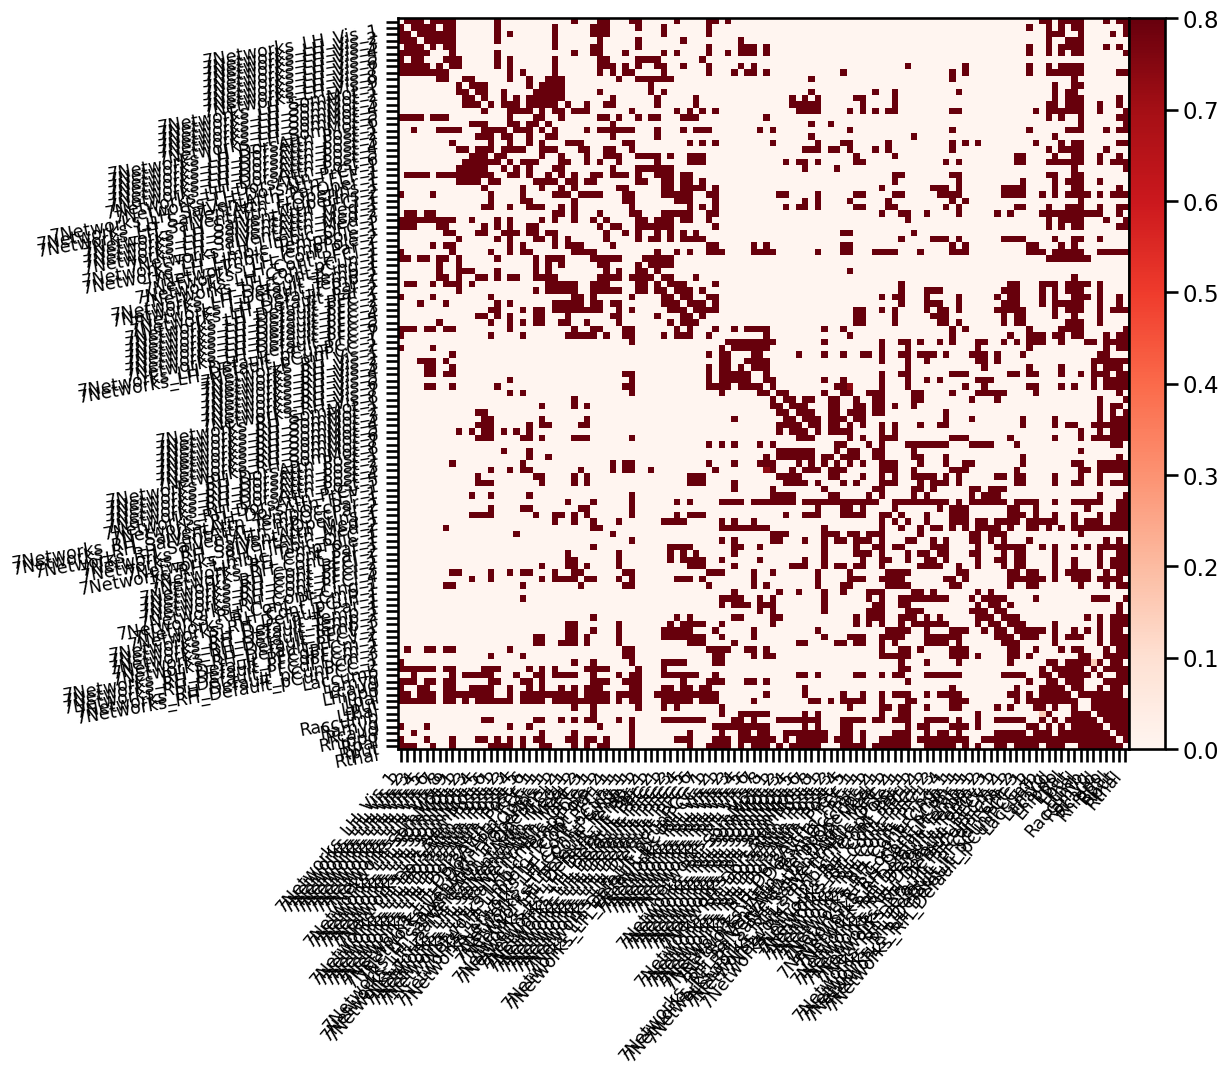

In [18]:
sc_combined_mat_schaef_100, sc_combined_labels_schaef_100 = load_sc_as_one(parcellation='schaefer_100')
print(sc_combined_mat_schaef_100.shape)
sc_all_schaef = plotting.plot_matrix(sc_combined_mat_schaef_100, figure=(9, 9), labels=sc_combined_labels_schaef_100, vmax=0.8, vmin=0, cmap='Reds')

Y_sc = load_connectome(measure='SC', omit_subcortical=False)

# with open('schaef114_regions.txt', 'w') as f:
#     for line in sc_combined_labels_schaef_100:
#         f.write(f"{line}\n")

# Save to CSV
# np.savetxt('schaef114_structural_conn.csv', Y_sc, delimiter=',')


### Transcriptome PCA kronecker + additional features

Number of components explaining 95.0% of the variance: 34
self.Y_sc [[ 0.      8.274   9.3887 ...  0.      4.804   4.9657]
 [ 8.274   0.     10.397  ...  0.      0.      4.2923]
 [ 9.3887 10.397   0.     ...  2.2859  0.      4.2418]
 ...
 [ 0.      0.      2.2859 ...  0.     10.888   9.2242]
 [ 4.804   0.      0.     ... 10.888   0.      9.2048]
 [ 4.9657  4.2923  4.2418 ...  9.2242  9.2048  0.    ]]
self X shape (114, 114)
summary measure strength_and_corr
Processing fold 0...
STRUCT SUM CALL
STRUCT SUMM MODALITY
expanded_X [[ 0.          0.75122087]
 [ 9.3887      0.75122087]
 [10.397       0.67678937]
 ...
 [ 8.4851      0.32661975]
 [ 0.          0.4149168 ]
 [ 8.287       0.4149168 ]]
STRUCT SUMM MODALITY
expanded_X [[ 8.274       0.65039125]
 [ 0.          0.65039125]
 [ 9.3887     -0.07688557]
 ...
 [ 2.0214      0.40664935]
 [ 0.          0.64962562]
 [ 5.6364      0.64962562]]
Fold 0 shapes - X_train: (7140, 2), X_test: (812, 2), Y_train: (7140,), Y_test: (812,)
Processing fol

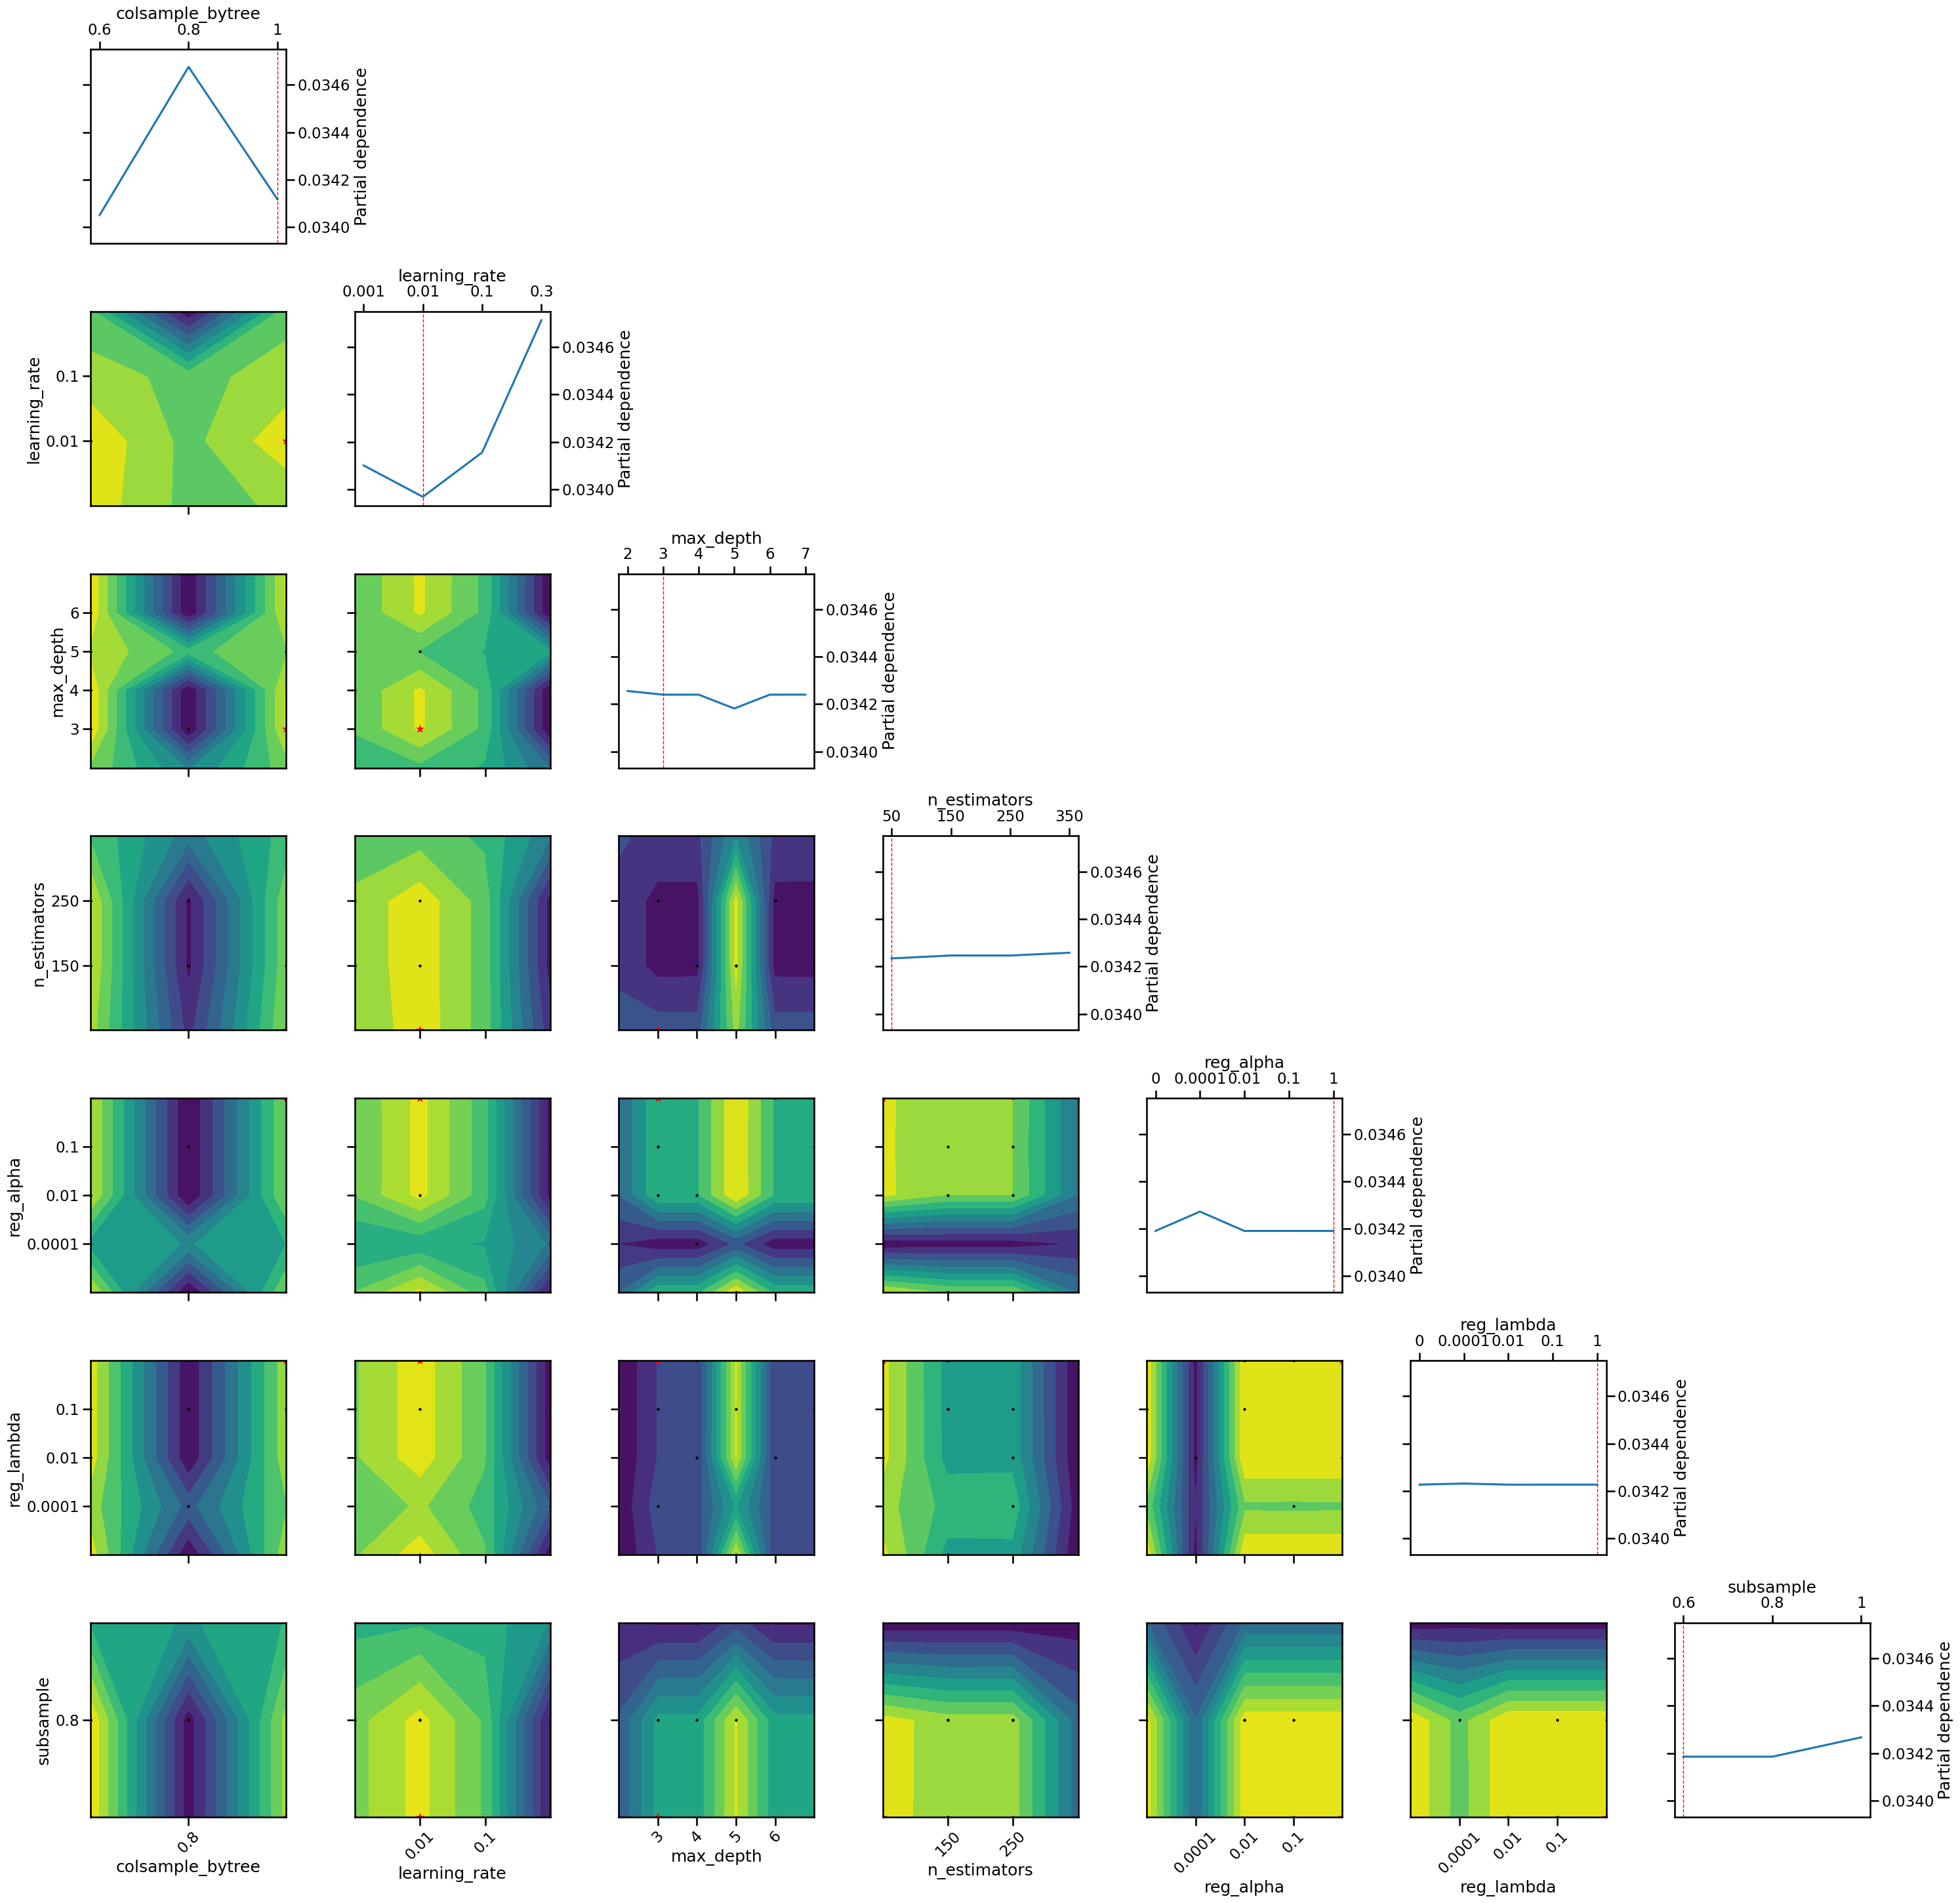


Train Metrics: {'mse': 0.03319850811178394, 'mae': 0.14394592064696726, 'r2': -10.58097416070813, 'pearson_corr': 0.23834740041849317, 'connectome_corr': 0.271111216711905, 'connectome_r2': -11.252488231331805, 'geodesic_distance': 15.194209932835154}
Test Metrics: {'mse': 0.02784130600108077, 'mae': 0.13035206713507647, 'r2': -5.651990654673539, 'pearson_corr': 0.281455478105988, 'connectome_corr': 0.1703745326616994, 'connectome_r2': -6.761503047637497, 'geodesic_distance': 7.094787376125233}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_

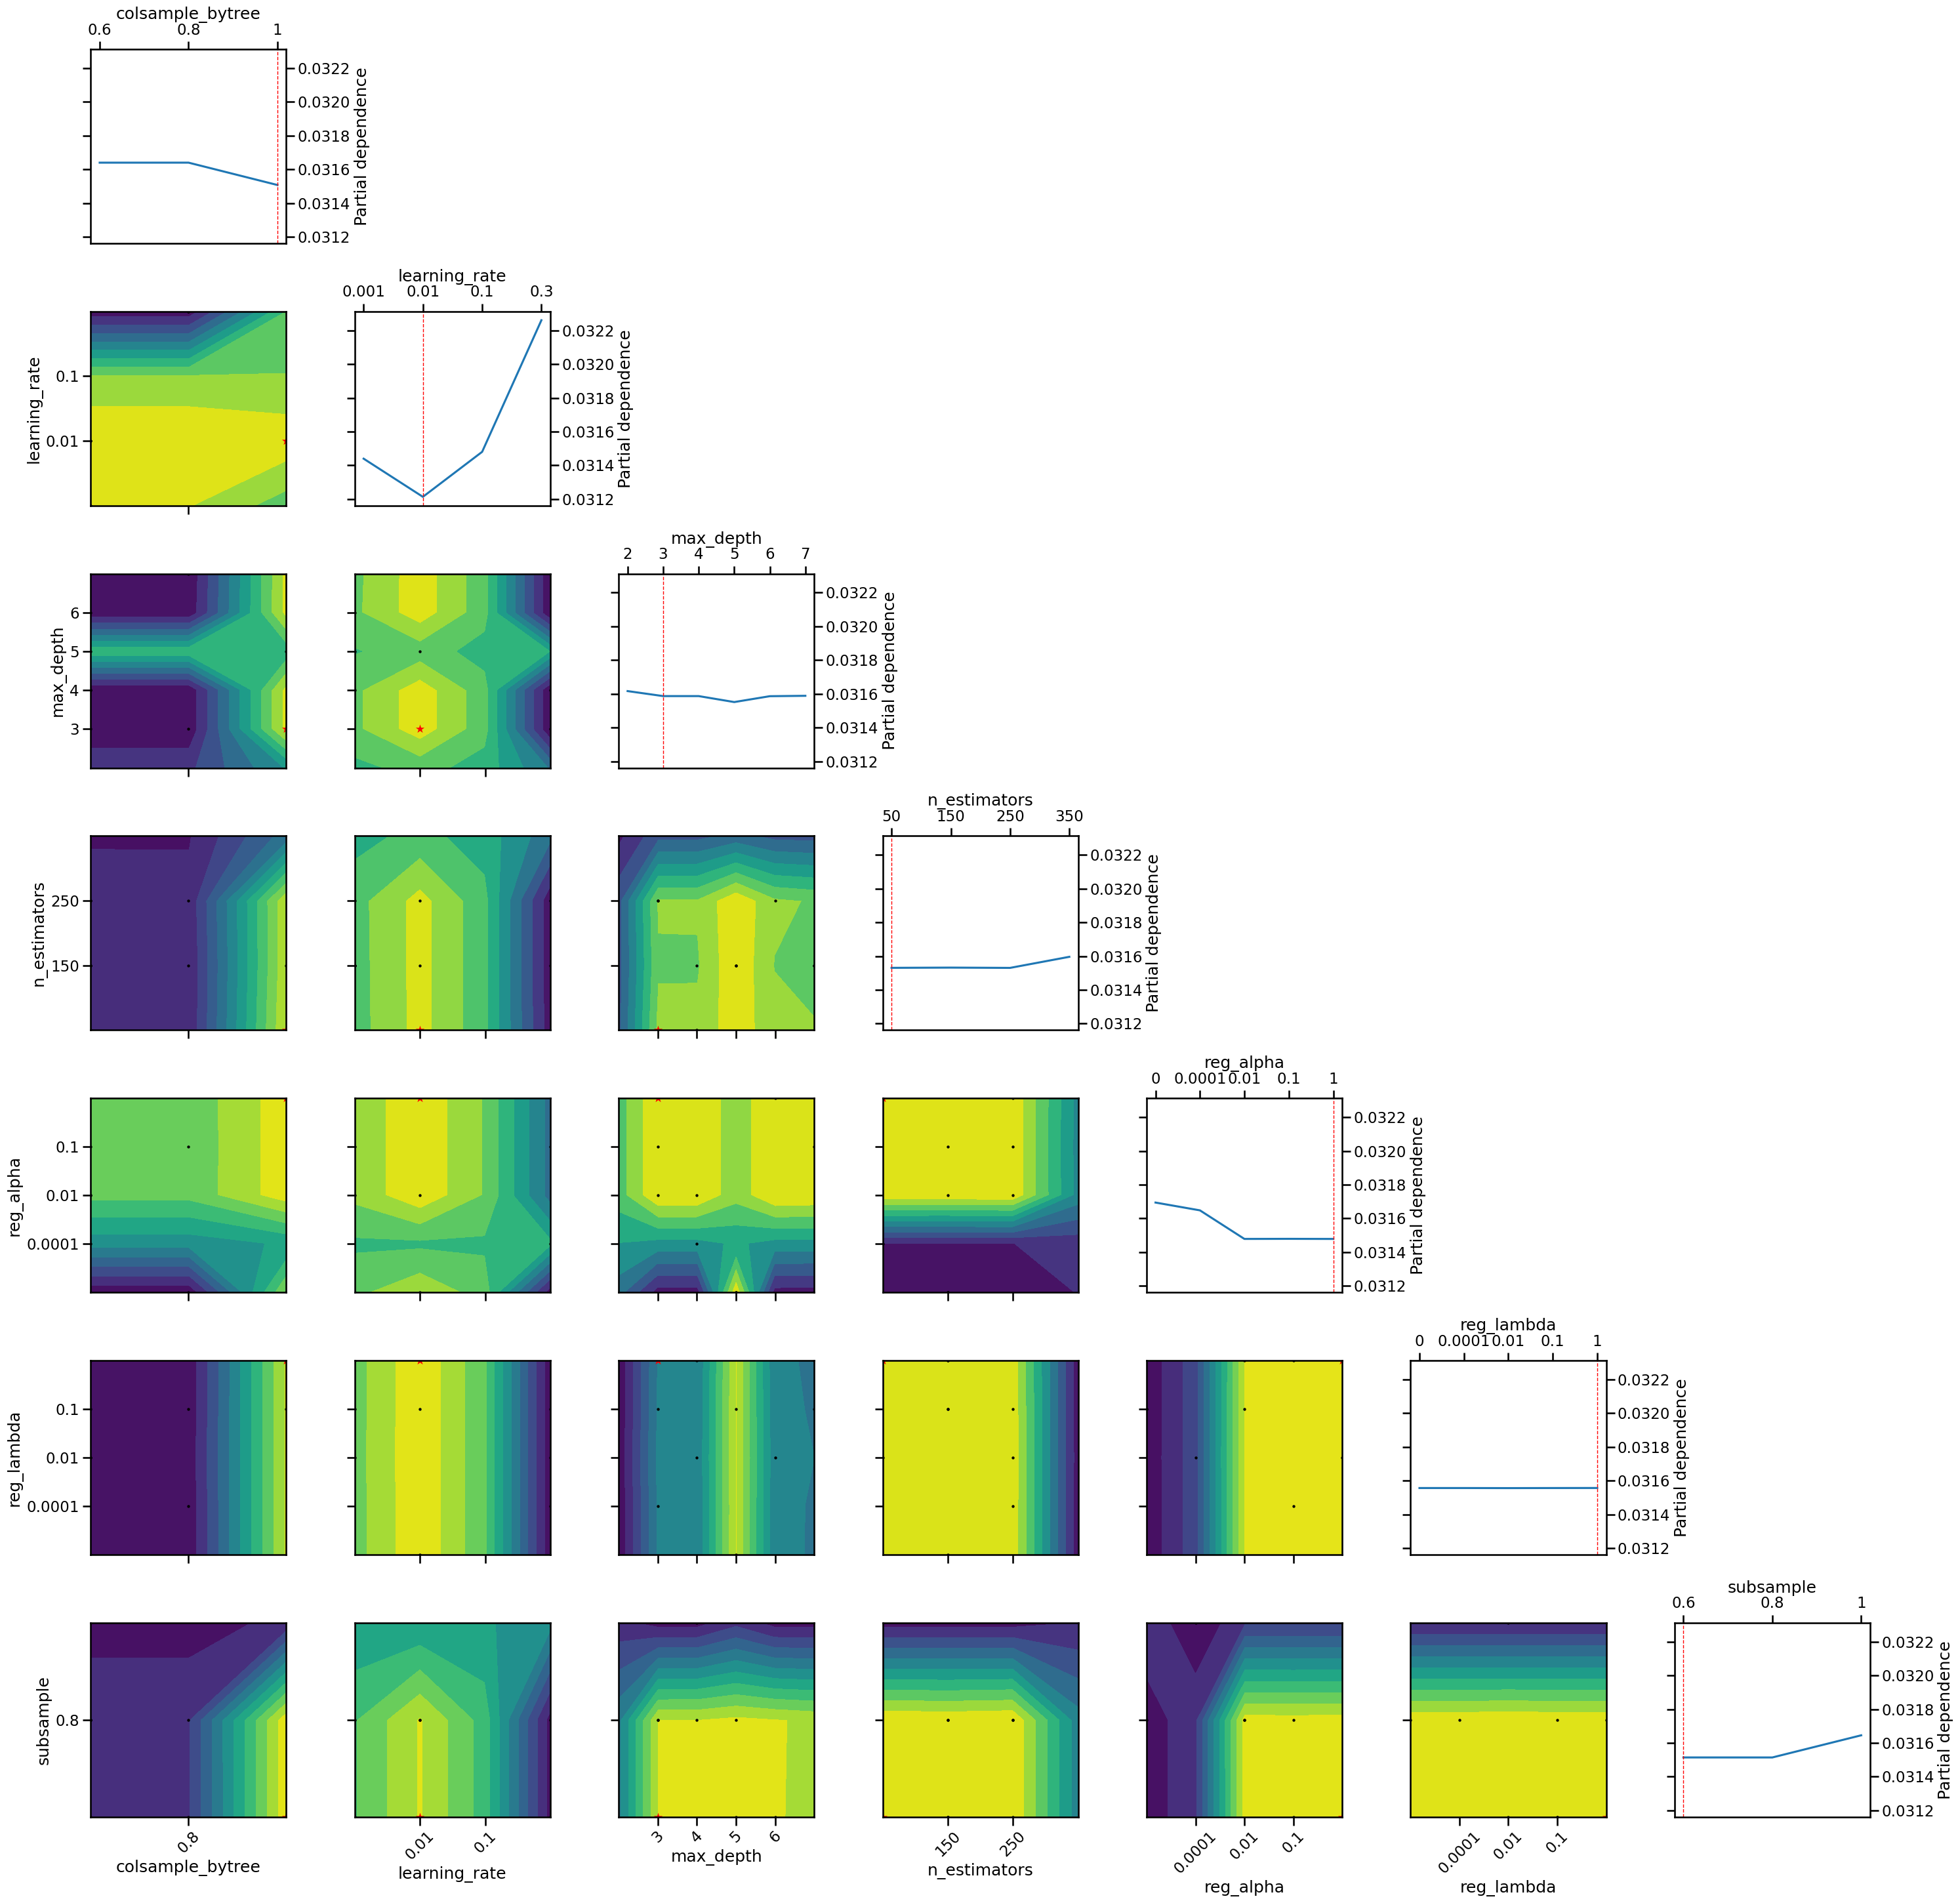


Train Metrics: {'mse': 0.029828754452637204, 'mae': 0.134211413252812, 'r2': -5.884770899236729, 'pearson_corr': 0.2263927000251891, 'connectome_corr': 0.2615738391018069, 'connectome_r2': -6.256018714824912, 'geodesic_distance': 13.584906728706063}
Test Metrics: {'mse': 0.03553507996971286, 'mae': 0.15271021755071018, 'r2': -19.59325696234189, 'pearson_corr': 0.24910775243154054, 'connectome_corr': 0.221809173874379, 'connectome_r2': -23.46854414090228, 'geodesic_distance': 7.4081294546573355}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_

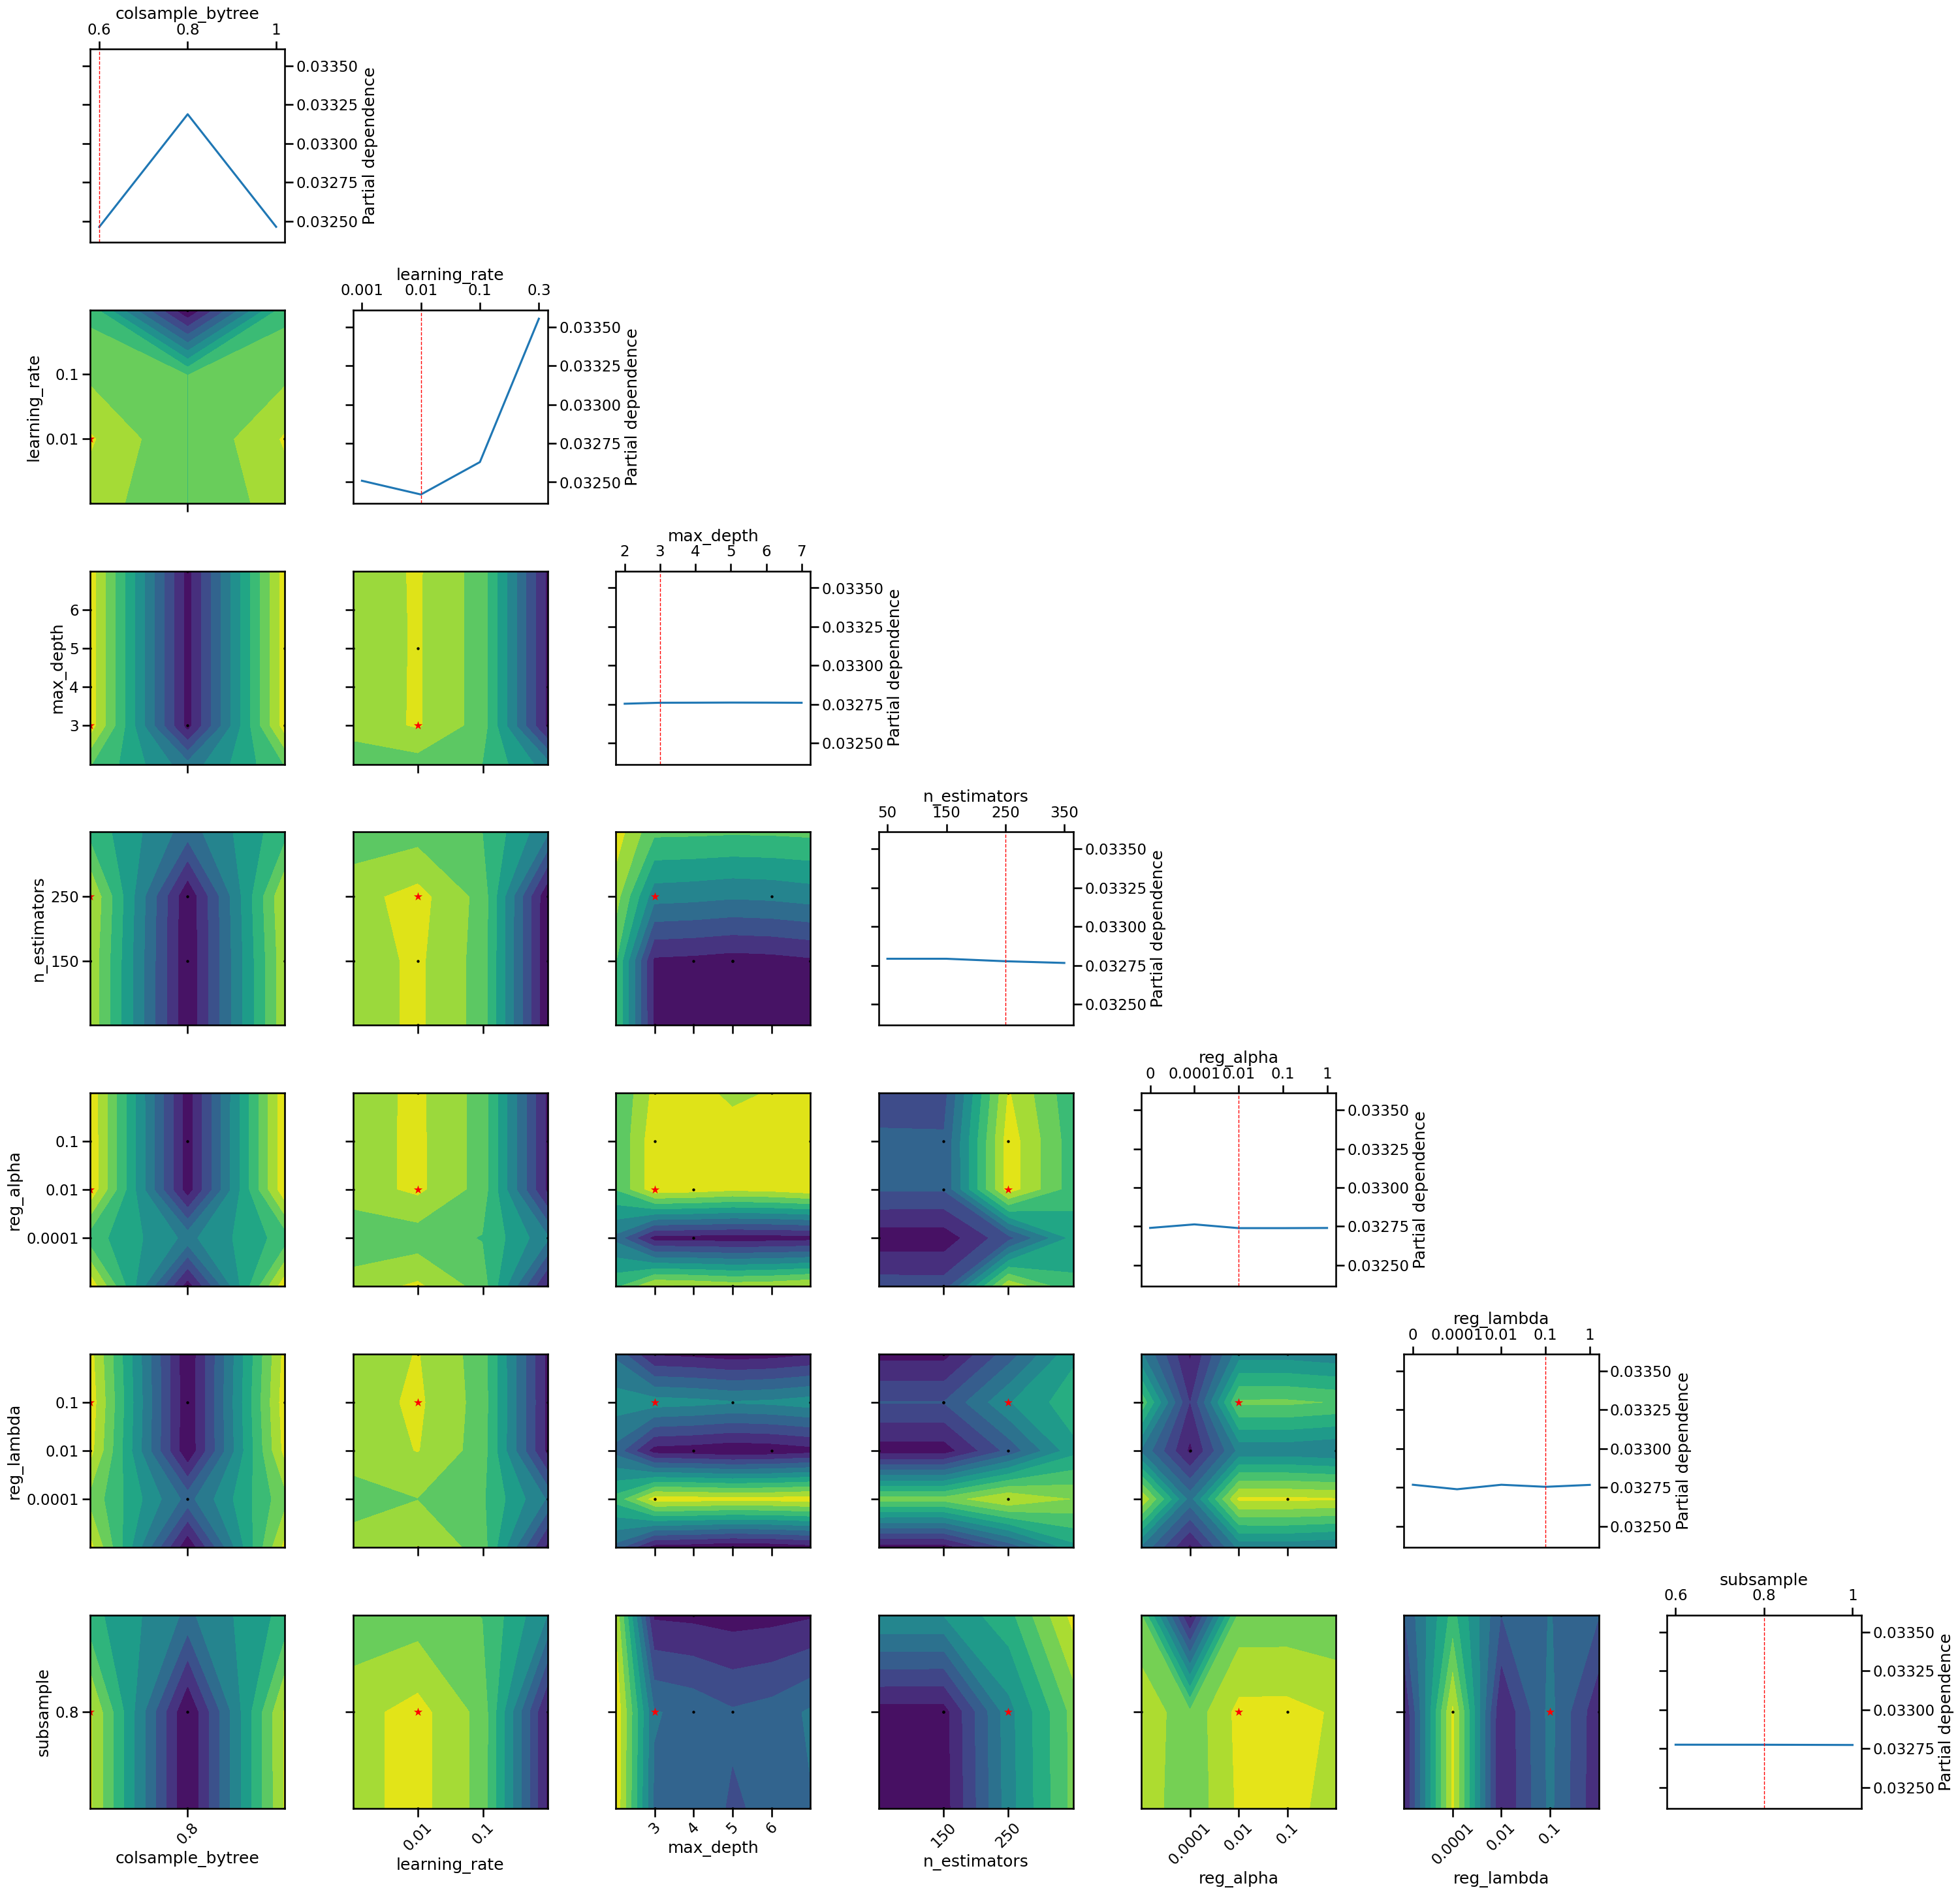


Train Metrics: {'mse': 0.0307154982784521, 'mae': 0.13982295867781352, 'r2': -9.976173410785266, 'pearson_corr': 0.27502579374394664, 'connectome_corr': 0.27557528872986065, 'connectome_r2': -10.550572814705902, 'geodesic_distance': 15.223913533109855}
Test Metrics: {'mse': 0.030664616126244475, 'mae': 0.1238051130793664, 'r2': -0.1058459158780806, 'pearson_corr': 0.2762000088300527, 'connectome_corr': 0.06257626274686234, 'connectome_r2': -0.3249288392098541, 'geodesic_distance': 7.31849510119888}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None,

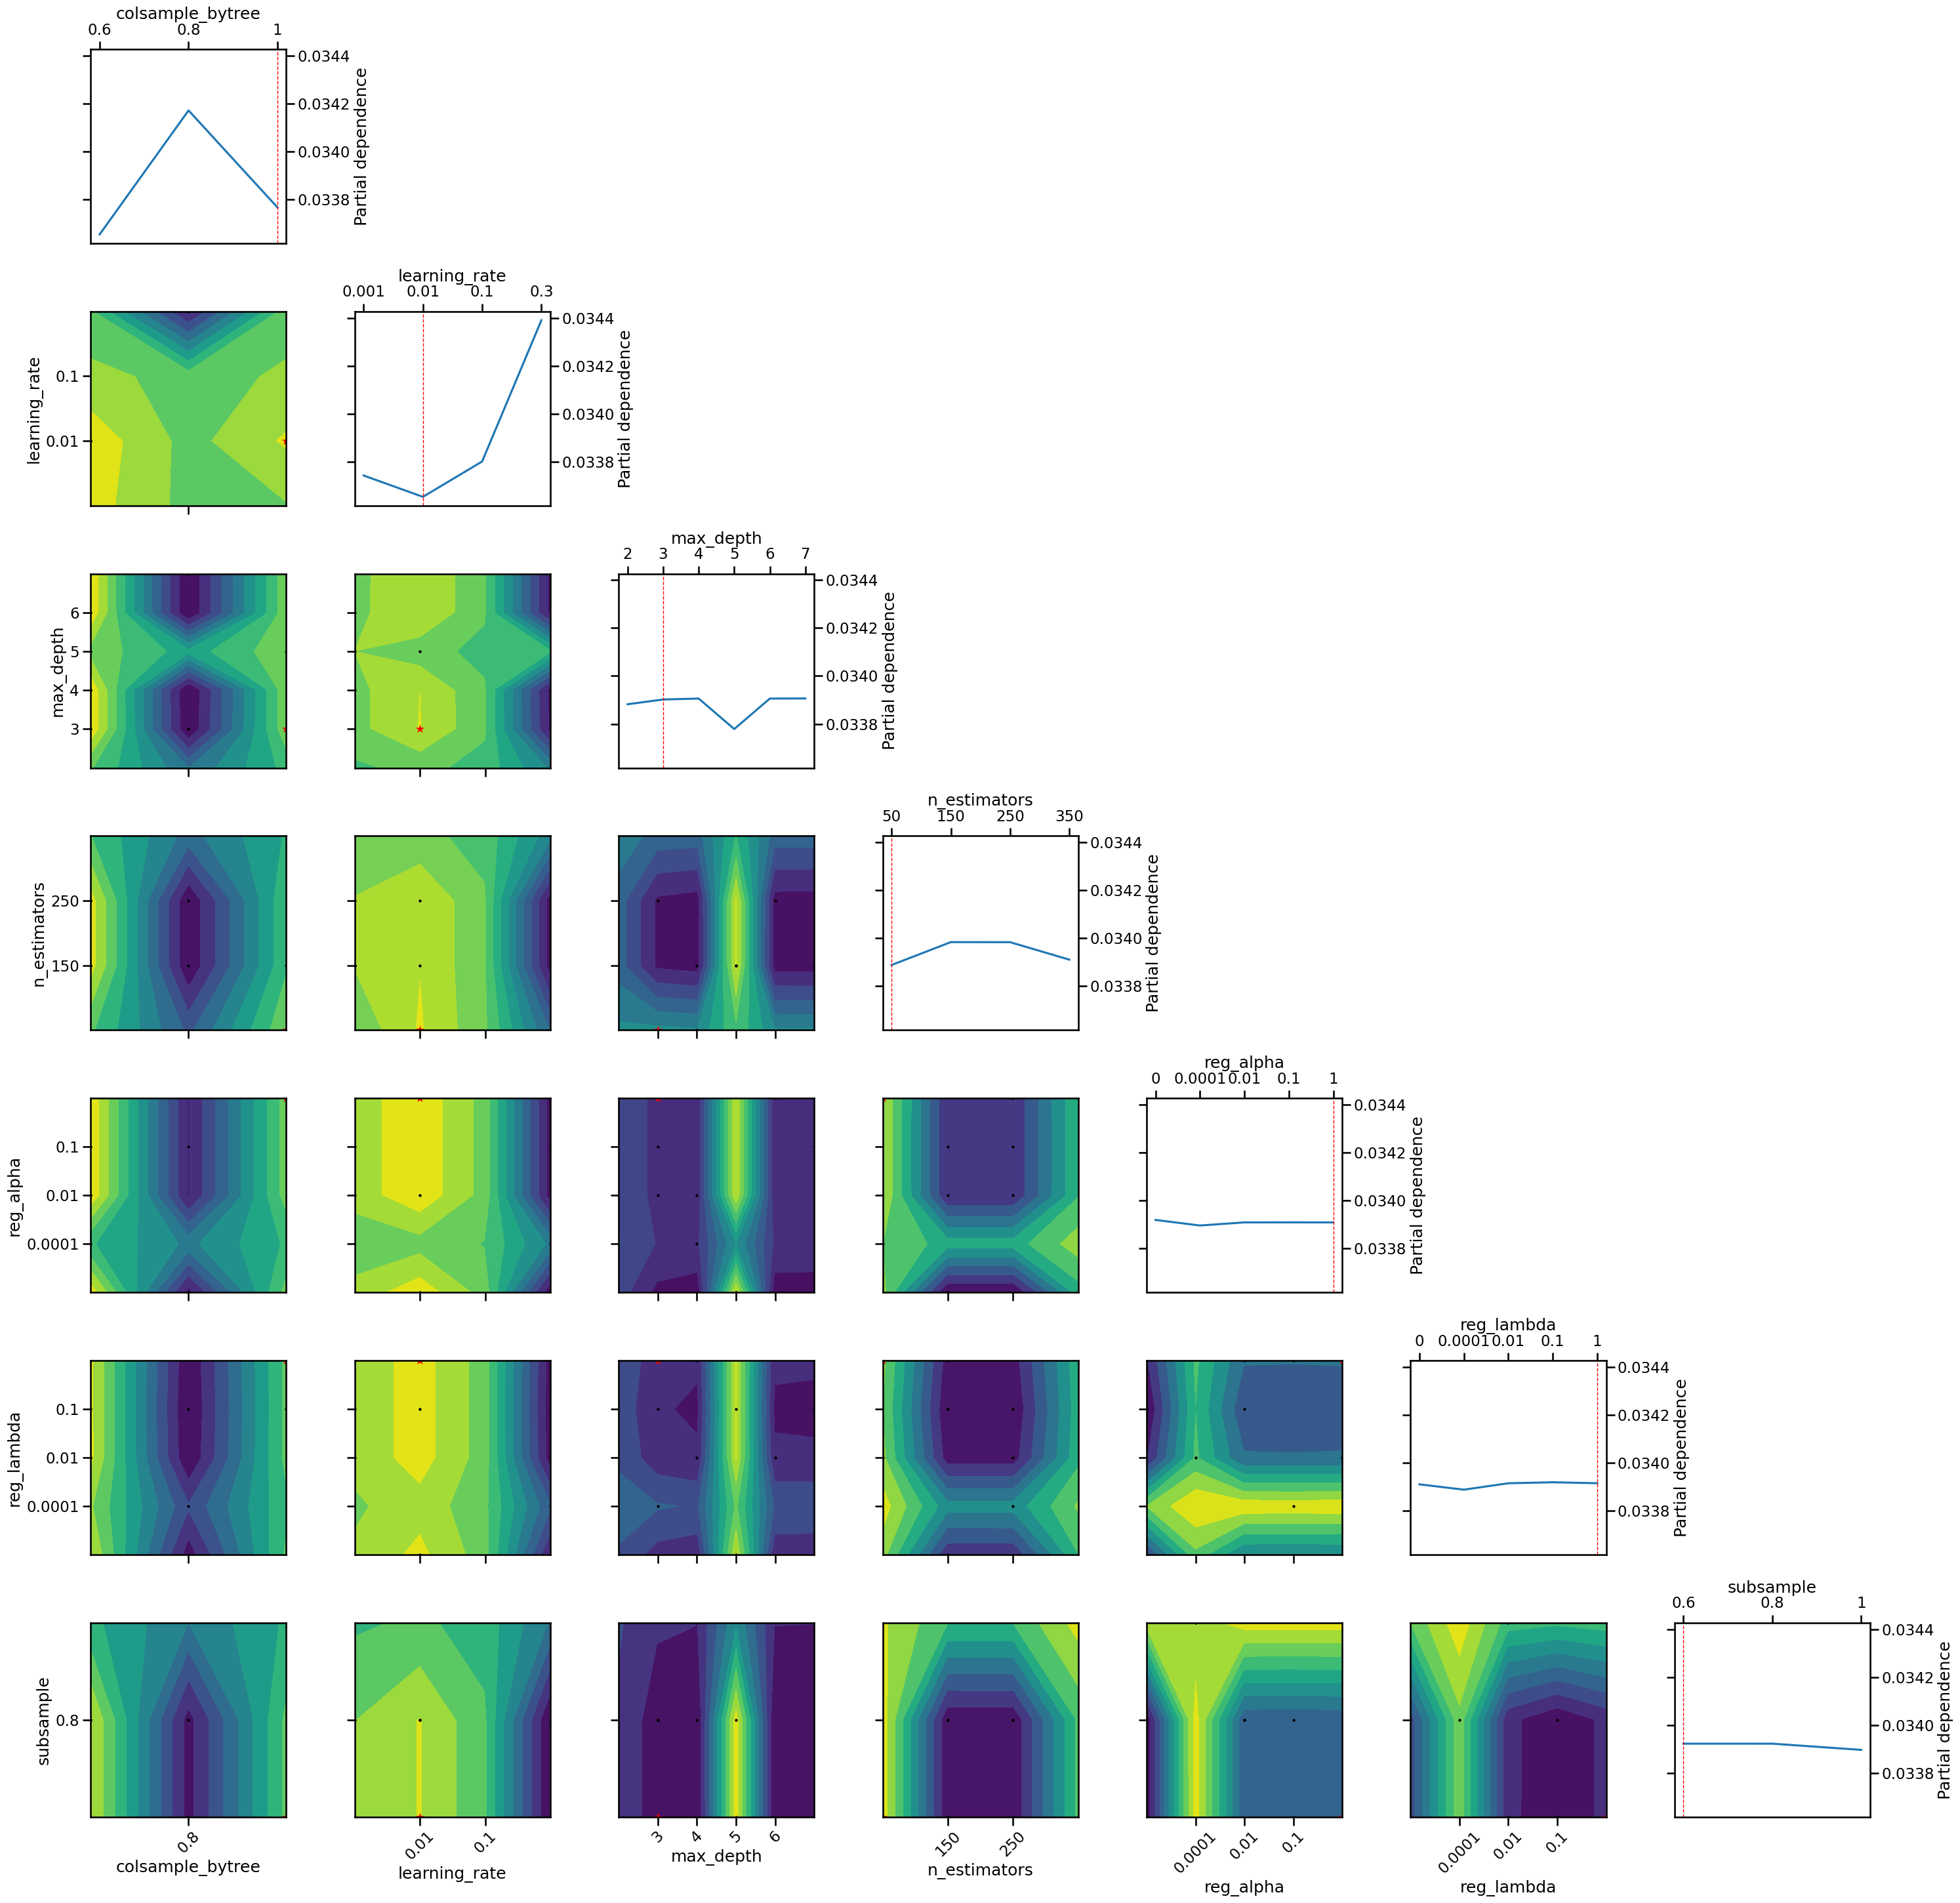


Train Metrics: {'mse': 0.032288658436853614, 'mae': 0.14061103179532056, 'r2': -11.559944875286694, 'pearson_corr': 0.22942562478403022, 'connectome_corr': 0.25854226735653196, 'connectome_r2': -12.480254211119457, 'geodesic_distance': 13.429196726195025}
Test Metrics: {'mse': 0.028817738208348175, 'mae': 0.13664537748579836, 'r2': -5.950843471245407, 'pearson_corr': 0.2799093757938325, 'connectome_corr': 0.2618396451294706, 'connectome_r2': -6.626847891575571, 'geodesic_distance': 5.918272707631103}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None,

In [32]:
transPCAkron_xgb_random_nonshared_sim_results = single_sim_run(
                                              cv_type='random',
                                              model_type='xgboost',
                                              feature_type=['structural'], # if you want to use transcriptomePCA with kronecker, you must start with transcriptomePCA in the feature_type list
                                              summary_measure='strength_and_corr',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False,
                                              save_sim=False,
                                              search_method=('bayes', 'mse')
                                              )

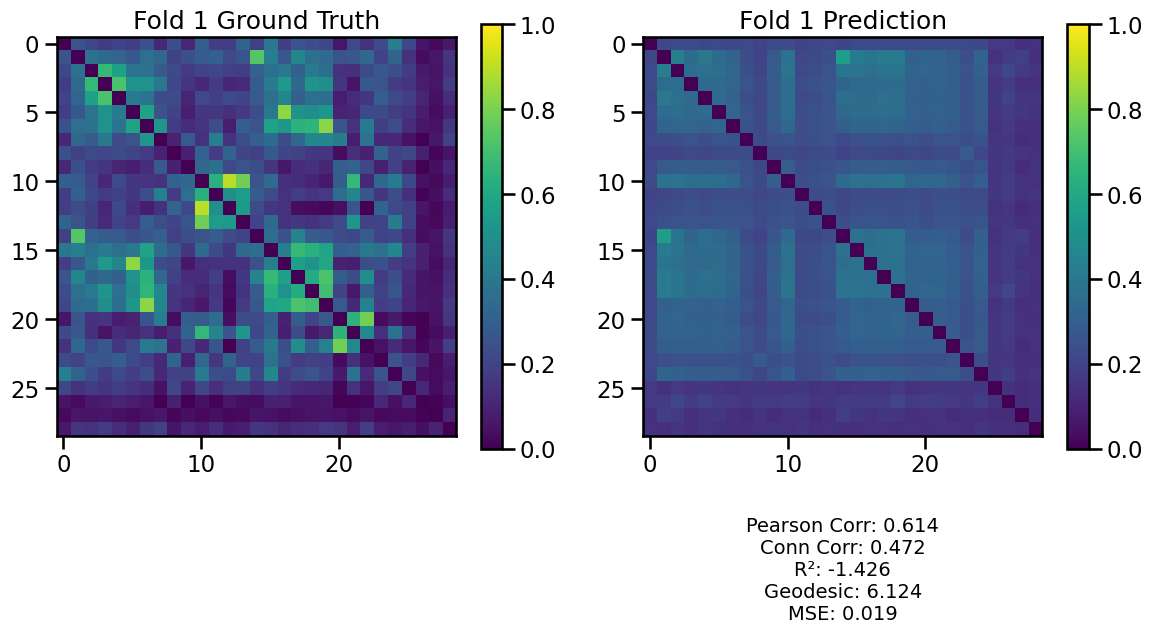

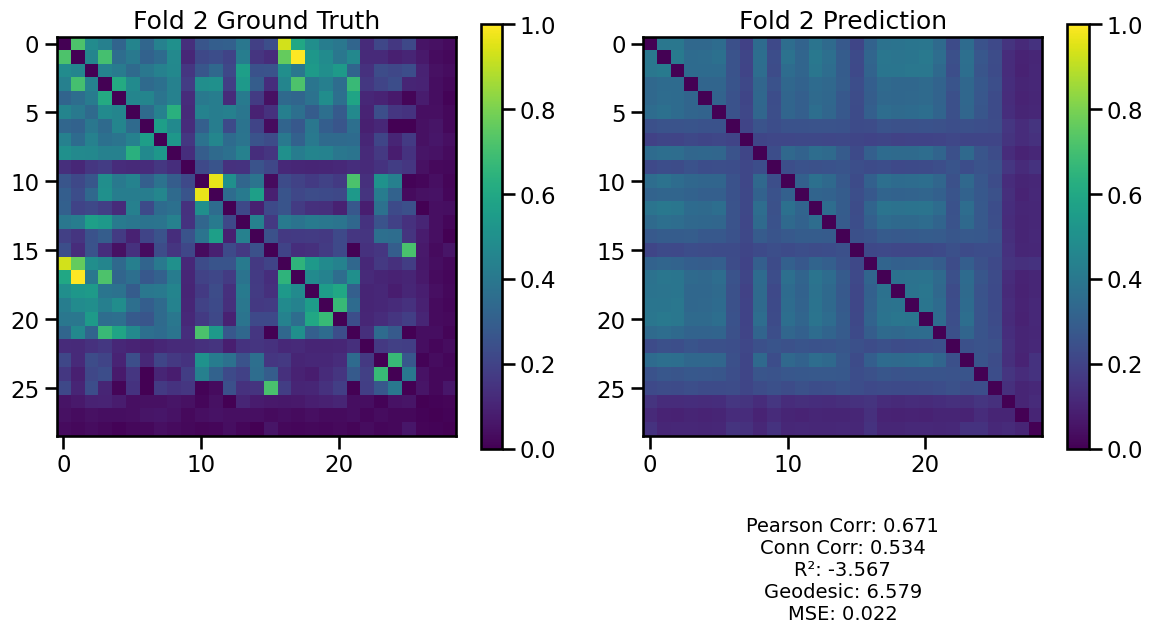

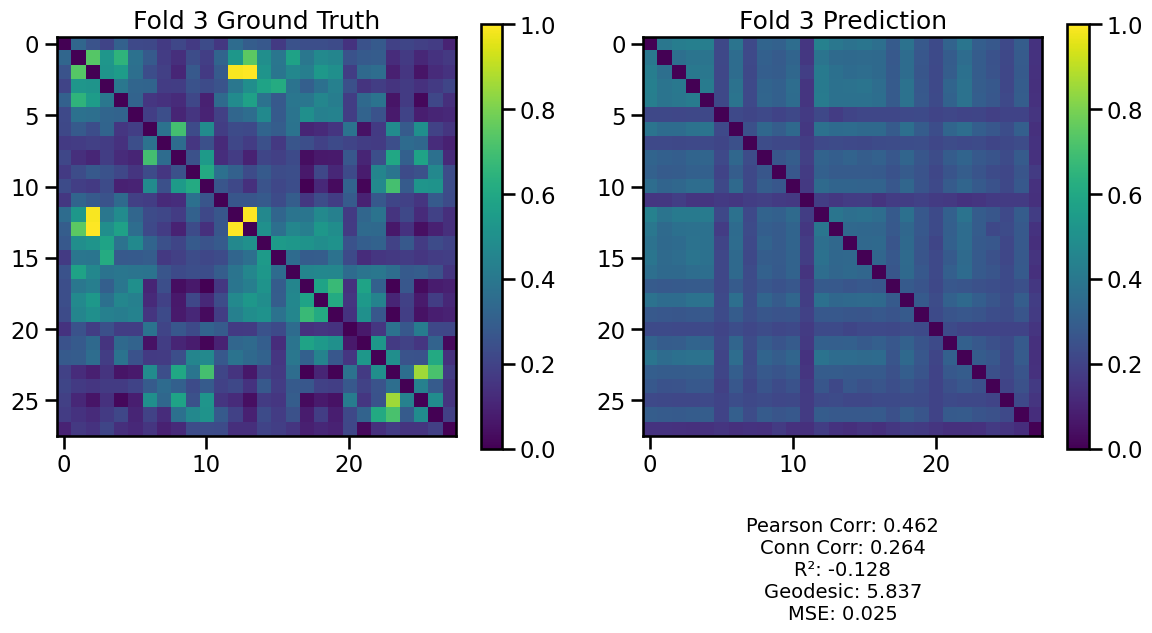

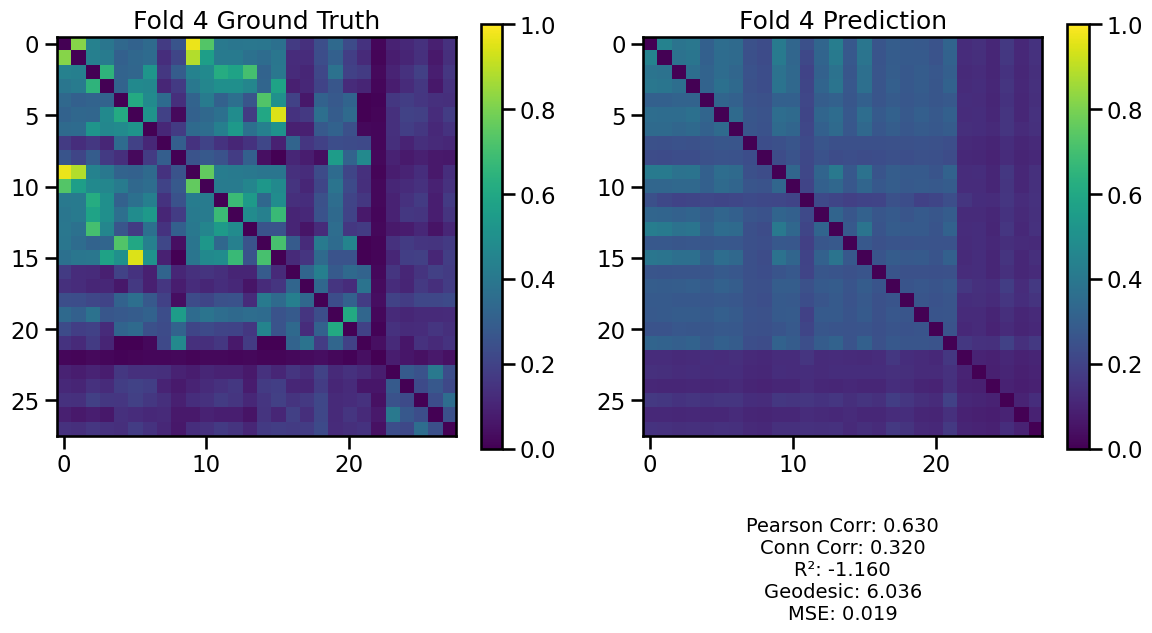

In [64]:
plot.plot_single_model_predictions_with_metrics(transPCAkron_xgb_random_nonshared_sim_results)

### MLP test

In [6]:
custom_mlp_random_nonshared_sim_results = single_sim_run(
                                              cv_type='random',
                                              model_type='mlp',
                                              feature_type=['transcriptomePCA'],
                                              summary_measure=None,
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False,
                                              save_sim=False,
                                              search_method='bayes'
                                              )

Number of components explaining 95.0% of the variance: 34
self X shape (114, 34)
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(7140, 68) (7140,) (812, 68) (812,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
MLP input size 68
ACCELERATING
{'base_estimator': 'GP', 'acq_func': 'PI'}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END batch_size=62, dropout=0.4183177229531975, epochs=473, l2_reg=4.2815319280763424e-05, lr=0.0021892527128216433;, score=-0.367 total time=   8.9s
[CV 2/3] END batch_size=62, dropout=0.4183177229531975, epochs=473, l2_reg=4.2815319280763424e-05, lr=0.0021892527128216433;, score=-0.152 total time=   1.2s
[CV 3/3] END batch_size=62, dropout=0.4183177229531975, epochs=473, l2_reg=4.2815319280763424e-05, lr=0.0021892527128216433;, score=-0.228 total time=   1.2s
[CV 1/3] END batch_size=62, dropout=0.3052794004697432, epochs=396, l2_reg=4.063746627400014e-05, lr=0

KeyboardInterrupt: 

In [ ]:
plot.plot_single_model_predictions_with_metrics(custom_xgb_random_nonshared_sim_results)

### Distance

In [57]:
# Extract the coordinates from the DataFrame
coordinates = load_coords()

# Compute pairwise Euclidean distances
distance = squareform(pdist(coordinates, metric='euclidean'))

# Compute inverse of distance so closer regions have higher values
Y_dist = np.array(1/distance)

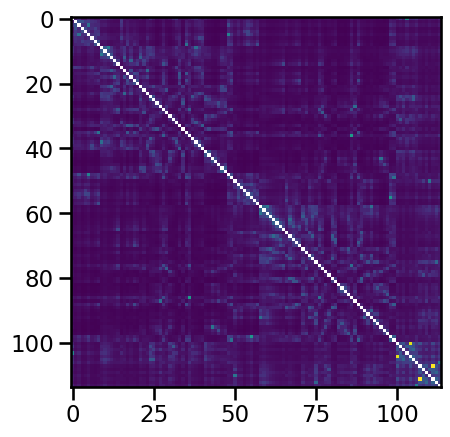

In [58]:
plt.imshow(Y_dist)

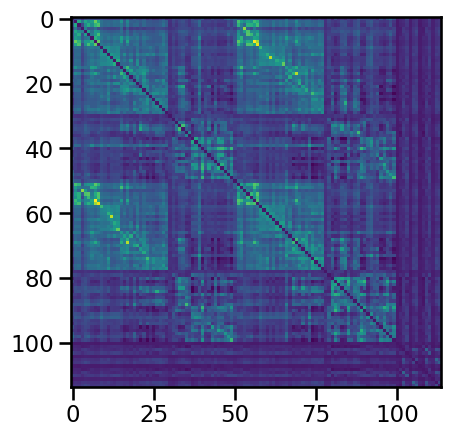

In [59]:
Y_fc = load_connectome()
plt.imshow(Y_fc)

#### Correlate distance-fMRI

In [60]:
# Flatten both matrices to compute the total correlation
np.fill_diagonal(Y_dist, val=0)
Y_dist = Y_dist.flatten()  # if it's a pandas DataFrame
Y_flat = Y_fc.flatten()  # Assuming Y is a numpy array

# Compute Pearson correlation between the flattened matrices
total_correlation = np.corrcoef(Y_dist, Y_flat)[0, 1]

# Print the total correlation value
print(f"Total Pearson correlation between the thresholded heatmap and true connectome: {total_correlation}")


Total Pearson correlation between the thresholded heatmap and true connectome: 0.18705201576764327


### Experiment Run for Euclidean Coordinates <a id="sims"></a>

In [26]:
euclid_xgb_random_nonshared_sim_results = single_sim_run(
                                              cv_type='random',
                                              model_type='xgboost',
                                              feature_type='euclidean',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False,
                                              save_sim=True,
                                              search_method='bayes'
                                              )

Number of components explaining 95.0% of the variance: 34


KeyError: 'e'

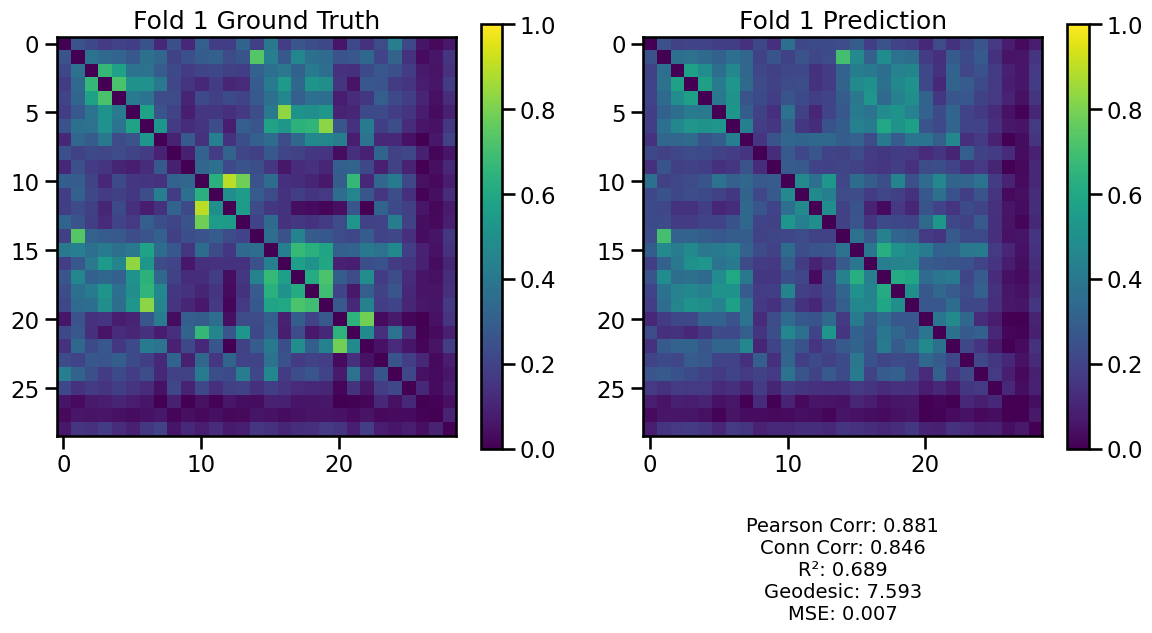

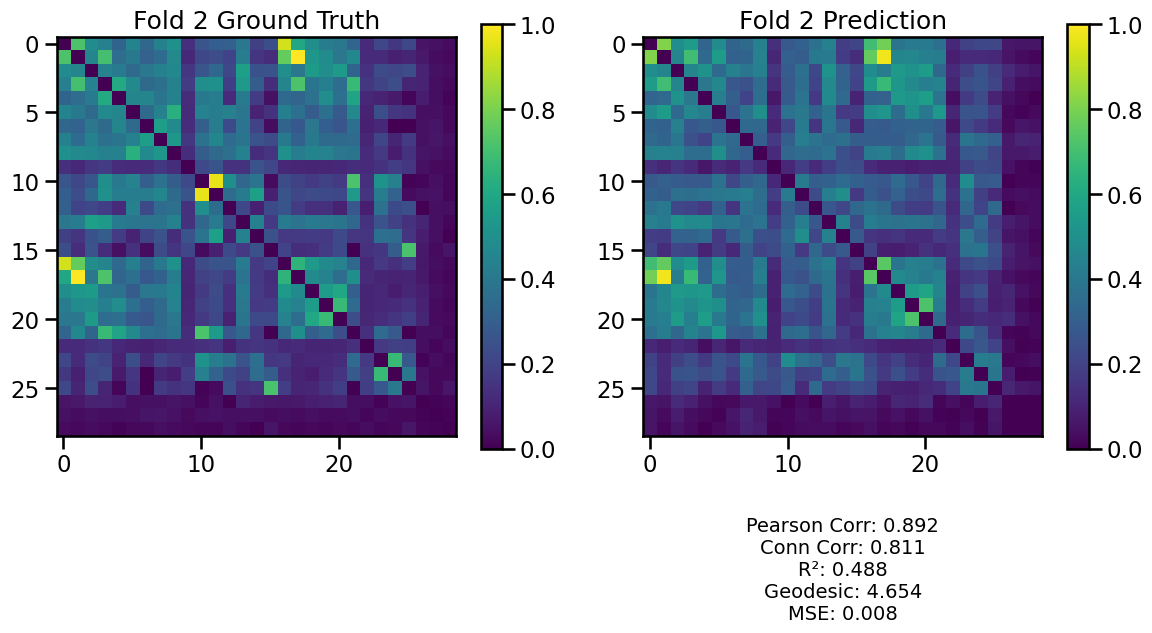

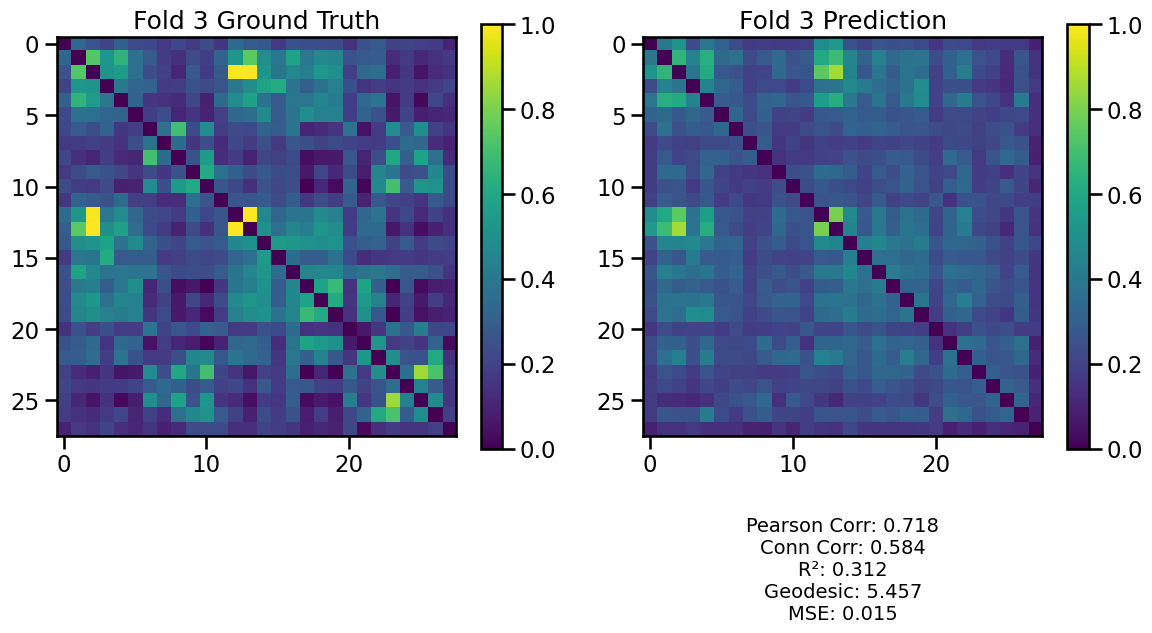

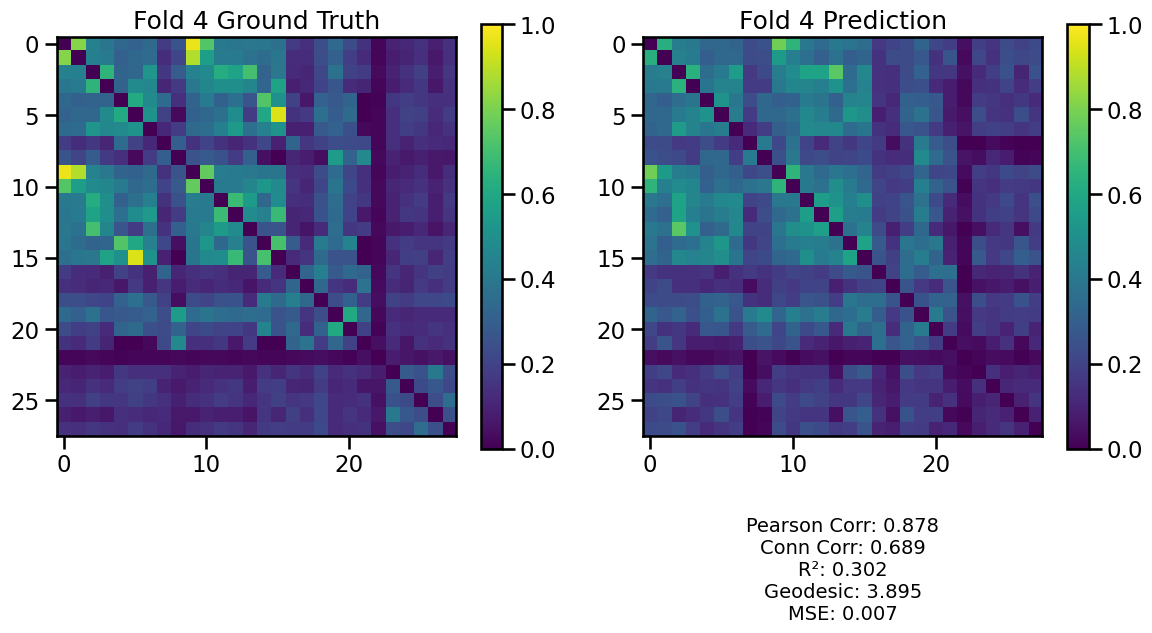

In [70]:
plot.plot_single_model_predictions_with_metrics(euclid_xgb_random_nonshared_sim_results)

Comparison to transcriptome for same split type

In [69]:
trans_sim_random_shared_xgb = multi_sim_run.open_pickled_results('single_sim_trans_bsearch_random_xgboost_useshared_trainshared.pickle')

plot.plot_single_model_predictions_with_metrics(trans_sim_random_shared_xgb)

In [64]:
trans_xgb_random_nonshared_sim_results = single_sim_run(cv_type='random',
                                              model_type='xgboost',
                                              feature_type='trans only',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False, 
                                              save_sim=False,
                                              search_method='grid'
                                              )

Number of components explaining 95% of the variance: 34
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(12070, 22106) (12070,) (812, 22106) (812,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END colsample_bytree=0.8, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, tree_method=hist, verbosity=2; total time=   3.4s
[CV] END colsample_bytree=0.8, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, tree_method=hist, verbosity=2; total time=   3.1s
[CV] END colsample_bytree=0.8, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, tr

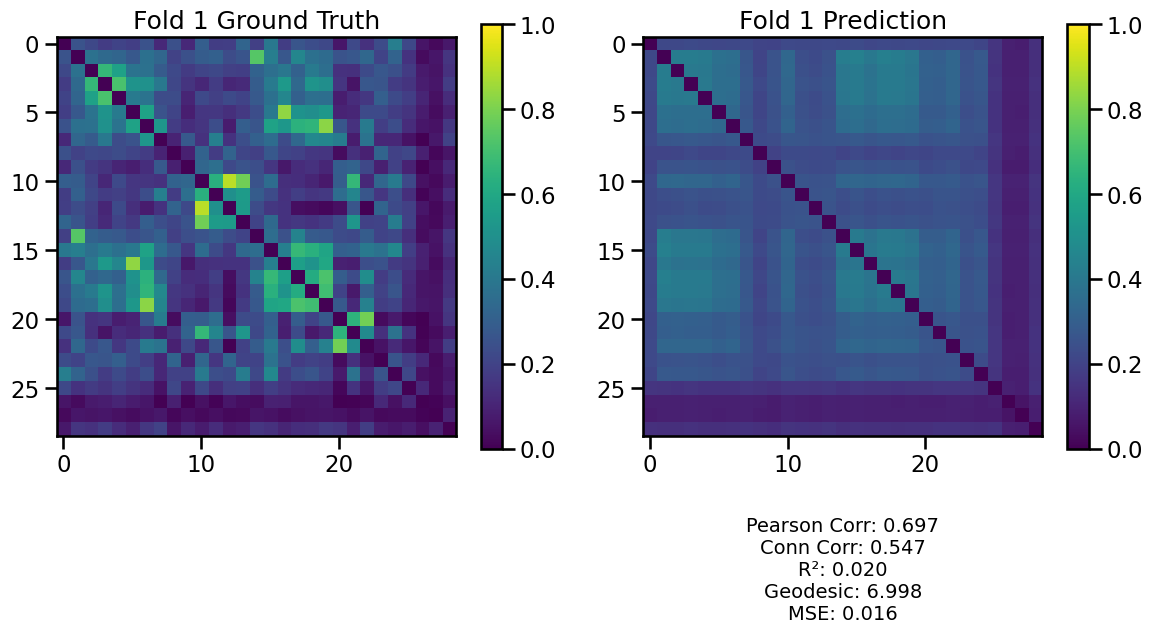

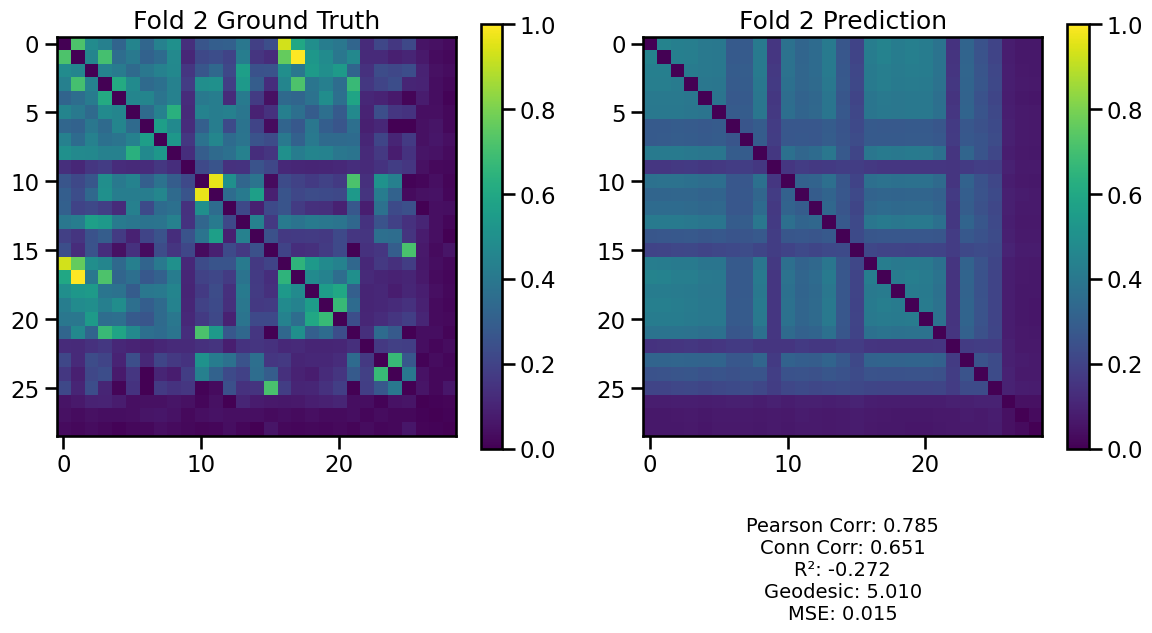

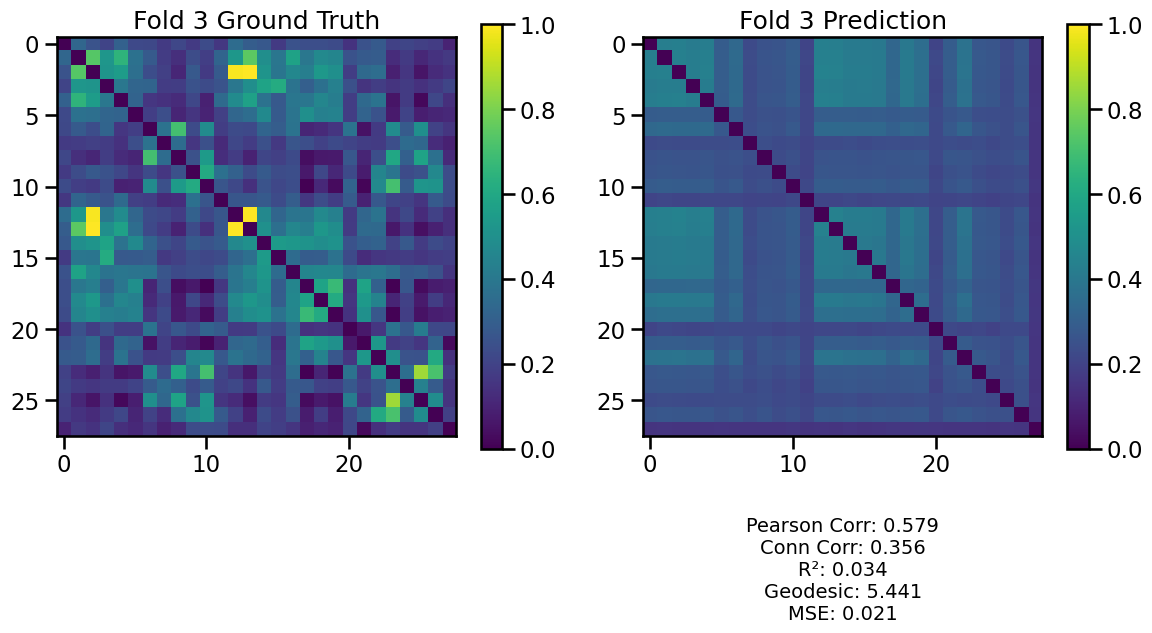

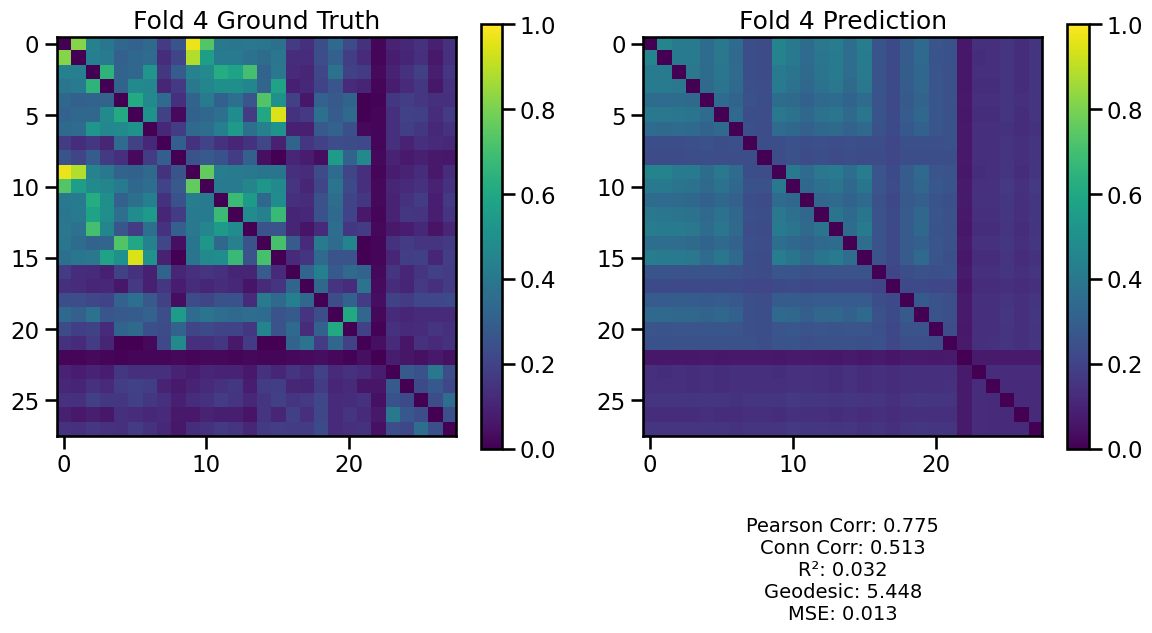

In [66]:
plot.plot_single_model_predictions_with_metrics(trans_xgb_random_nonshared_sim_results)

### Experiment Run for Structural Connectivity

In [11]:
structural_xgb_random_nonshared_sim_results = single_sim_run(cv_type='community',
                                              model_type='xgboost',
                                              feature_type='structural',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False,
                                              save_sim=False,
                                              search_method='grid'
                                              )

Number of components explaining 95% of the variance: 34
Processing fold 0...
Processing fold 1...
Processing fold 2...

 Test fold num: 1
(6320, 228) (6320,) (1122, 228) (1122,)
2
3
Processing fold 0...
Processing fold 1...
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total time=   3.2s
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total time=   2.5s

Grid Search CV Results:
Best Parameters:  {'colsample_bytree': 1, 'device': 'cuda', 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 250, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 1, 'tree_meth

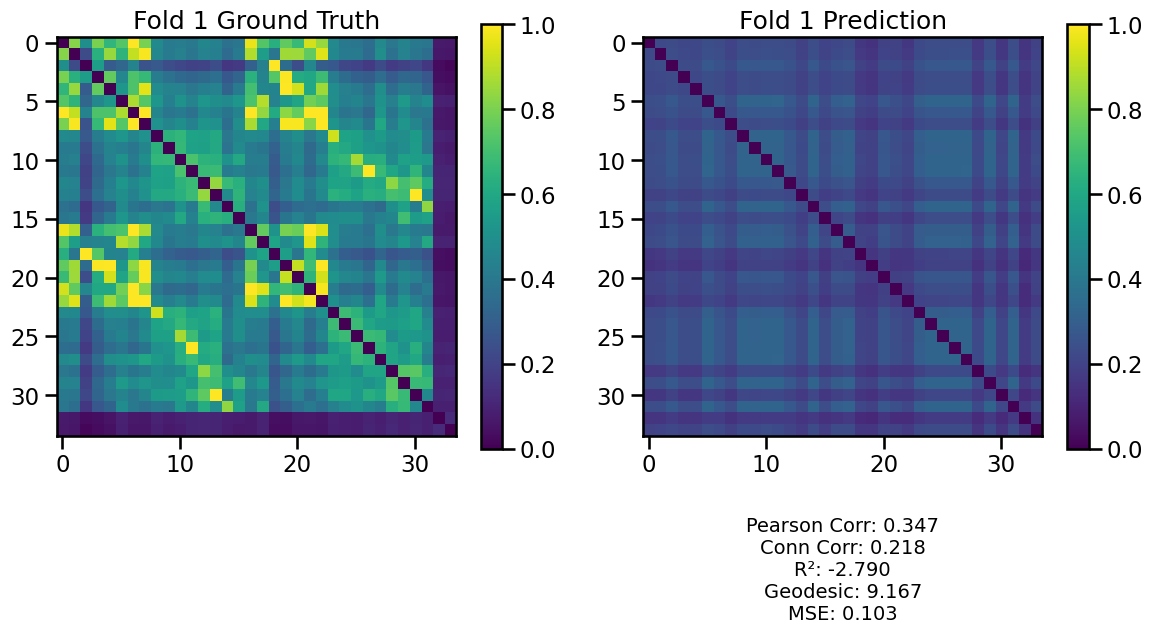

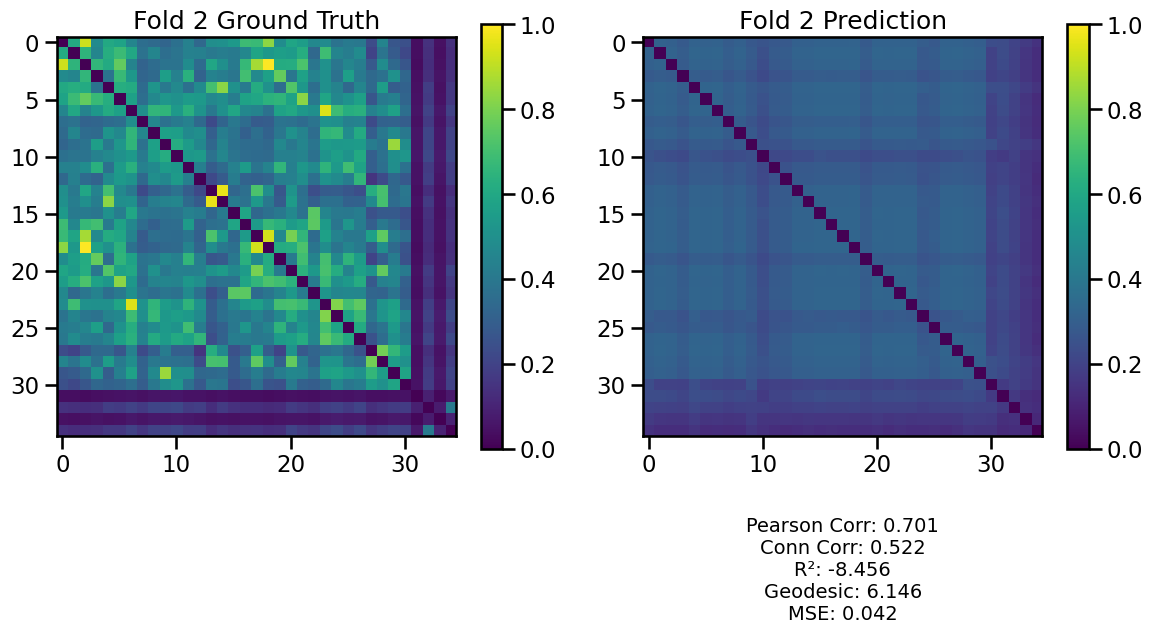

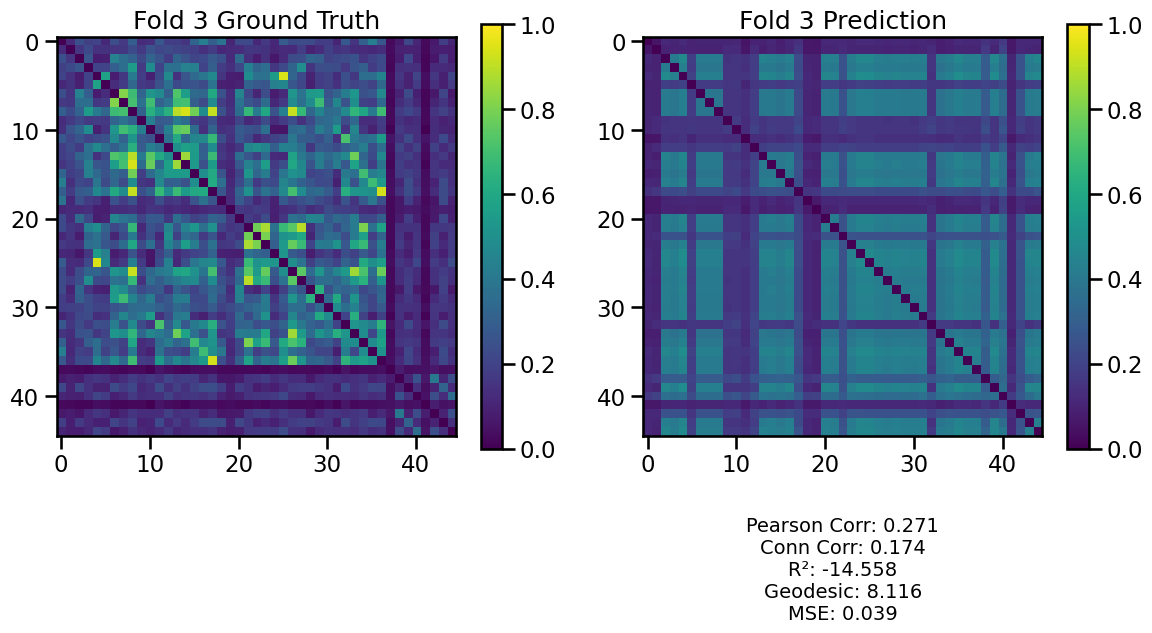

In [12]:
plot.plot_single_model_predictions_with_metrics(structural_xgb_random_nonshared_sim_results)

### Experiment Run for Transcriptome PCA

In [47]:
transPCA_xgb_random_nonshared_sim_results = single_sim_run(cv_type='random',
                                              model_type='xgboost',
                                              feature_type='trans only',
                                              summary_measure='PCA',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False, 
                                              save_sim=False,
                                              search_method='grid'
                                              )

Number of components explaining 95% of the variance: 40
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(7140, 80) (7140,) (812, 80) (812,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total time=   5.2s
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total time=   5.1s
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total tim

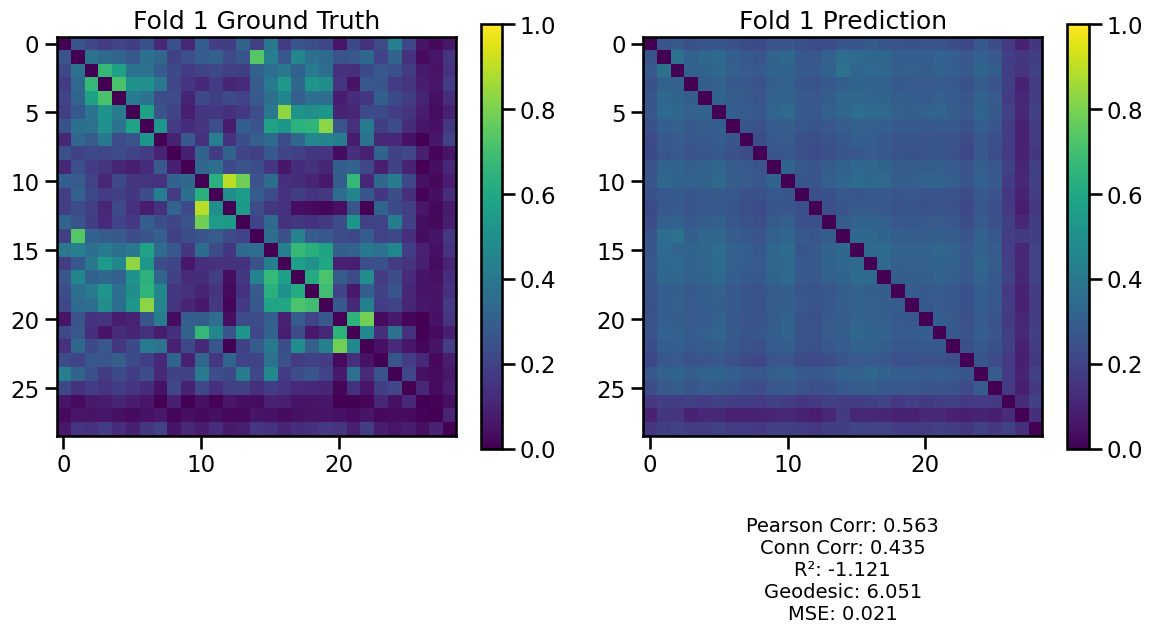

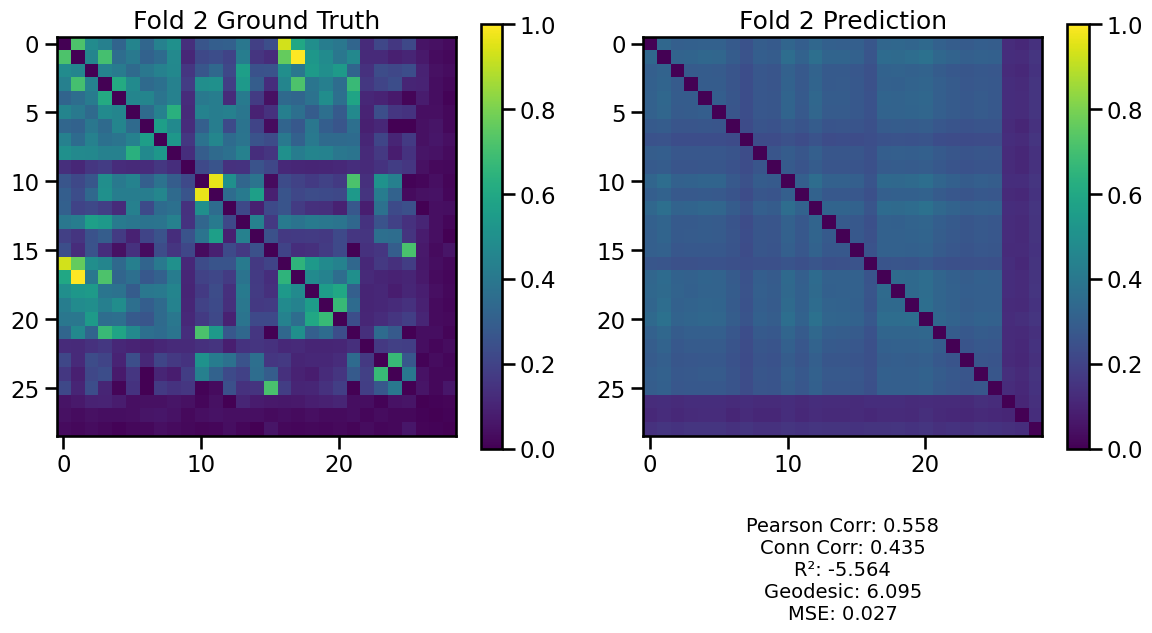

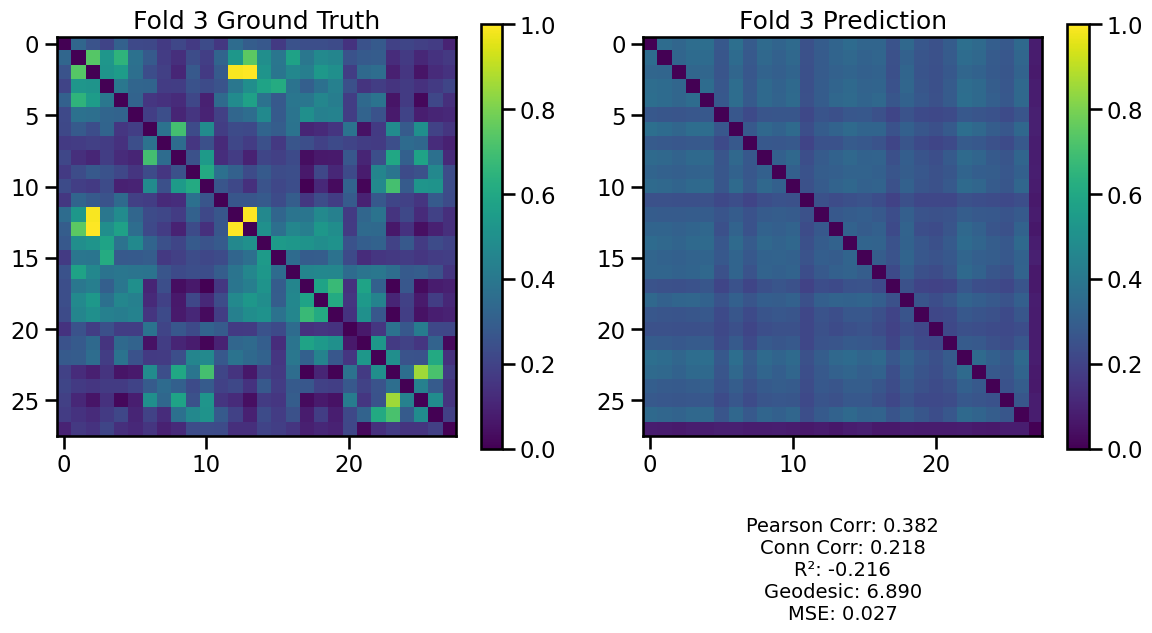

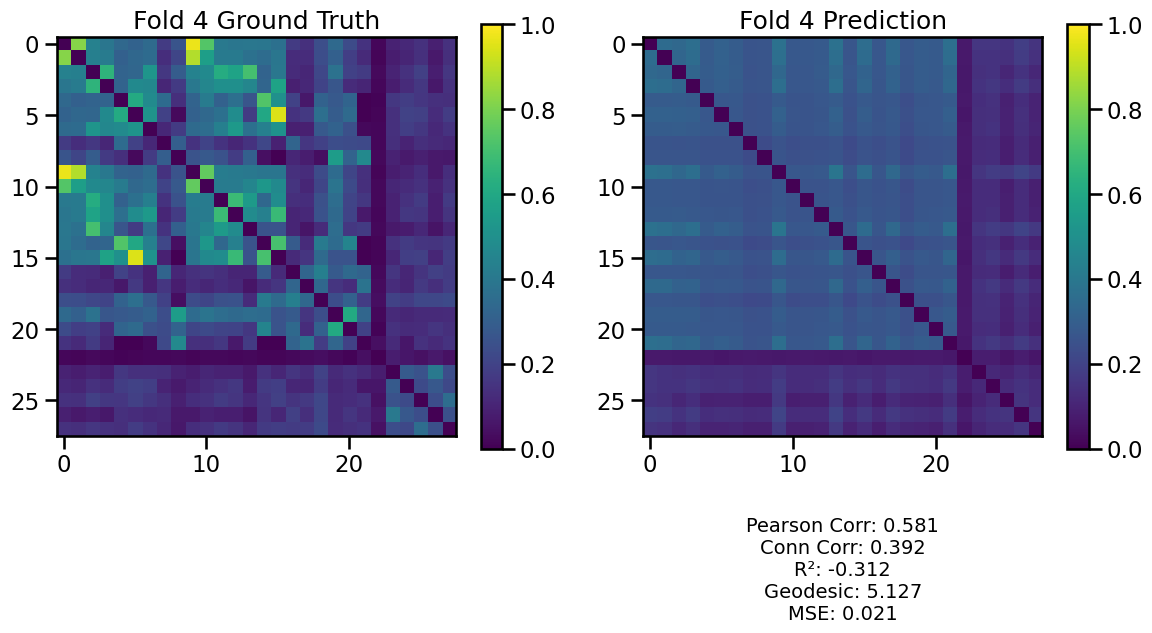

In [24]:
plot.plot_single_model_predictions_with_metrics(transPCA_xgb_random_nonshared_sim_results)

### Experiment Run for Transcriptome PCA+Kronecker

In [20]:
transPCAkron_xgb_random_nonshared_sim_results = single_sim_run(cv_type='random',
                                              model_type='xgboost',
                                              feature_type='trans only',
                                              summary_measure='PCA+kron',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False, 
                                              save_sim=False,
                                              search_method='bayes'
                                              )

Number of components explaining 95.0% of the variance: 34
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(7140, 1156) (7140,) (812, 1156) (812,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
ACCELERATING
{'base_estimator': 'GP', 'acq_func': 'PI'}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=0.481 total time=   6.3s
[CV 2/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=0.351 total time=   6.6s
[CV 3/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0

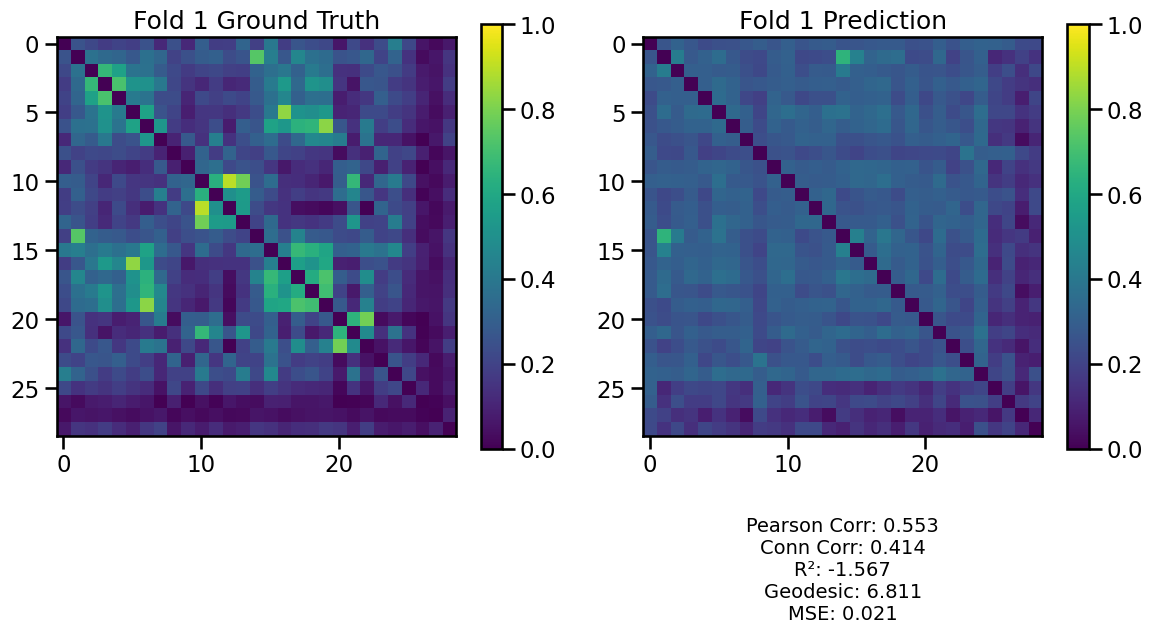

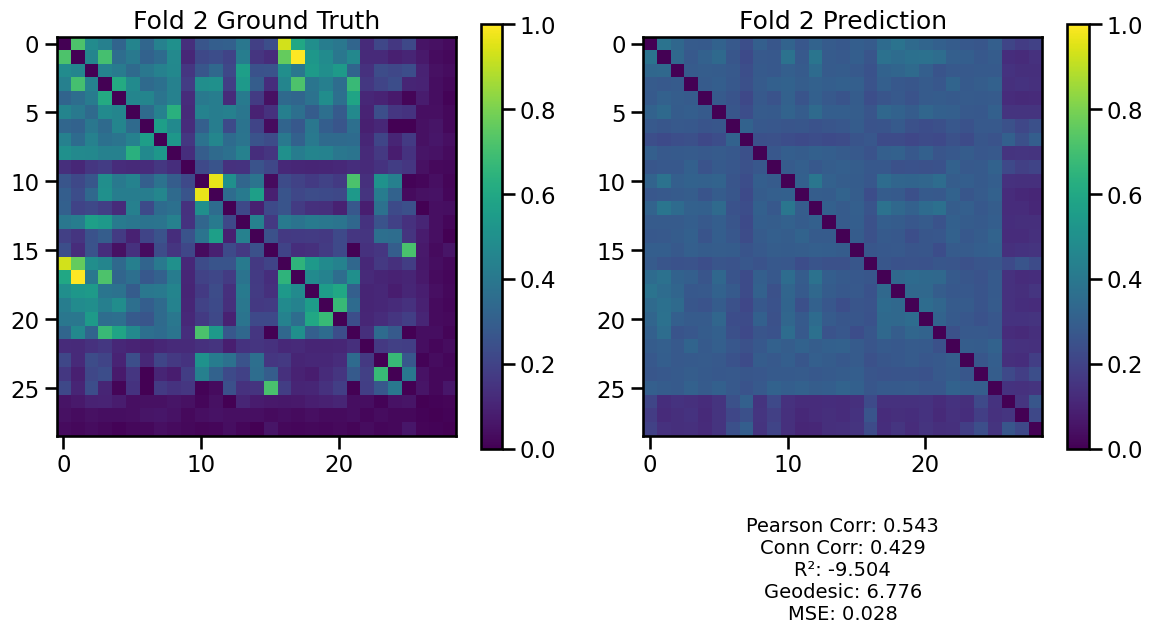

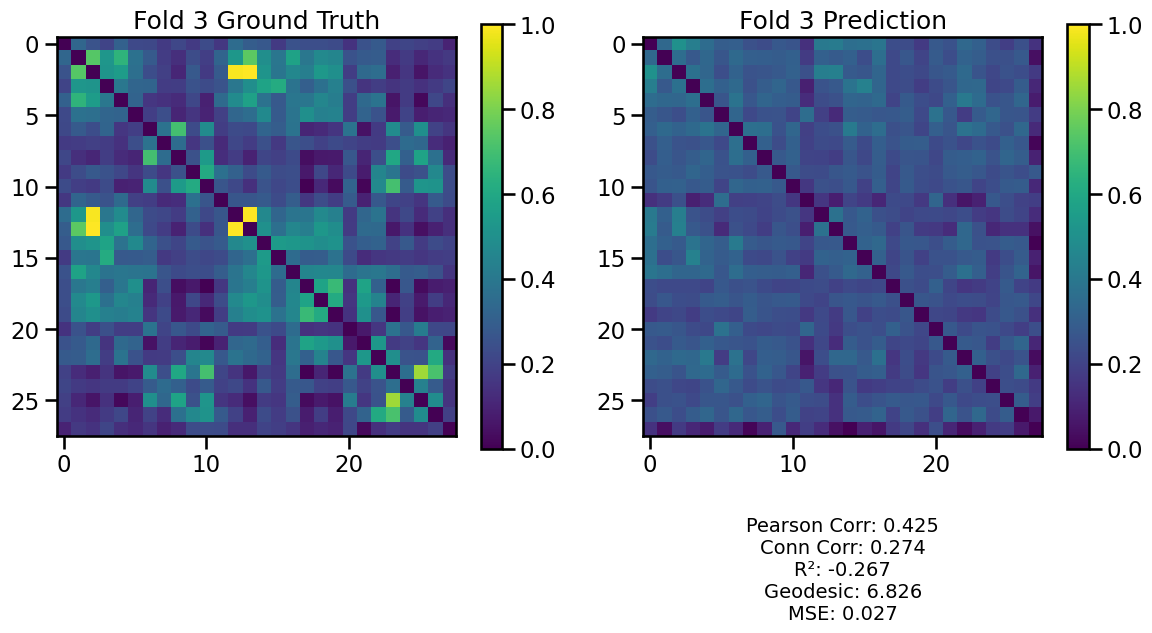

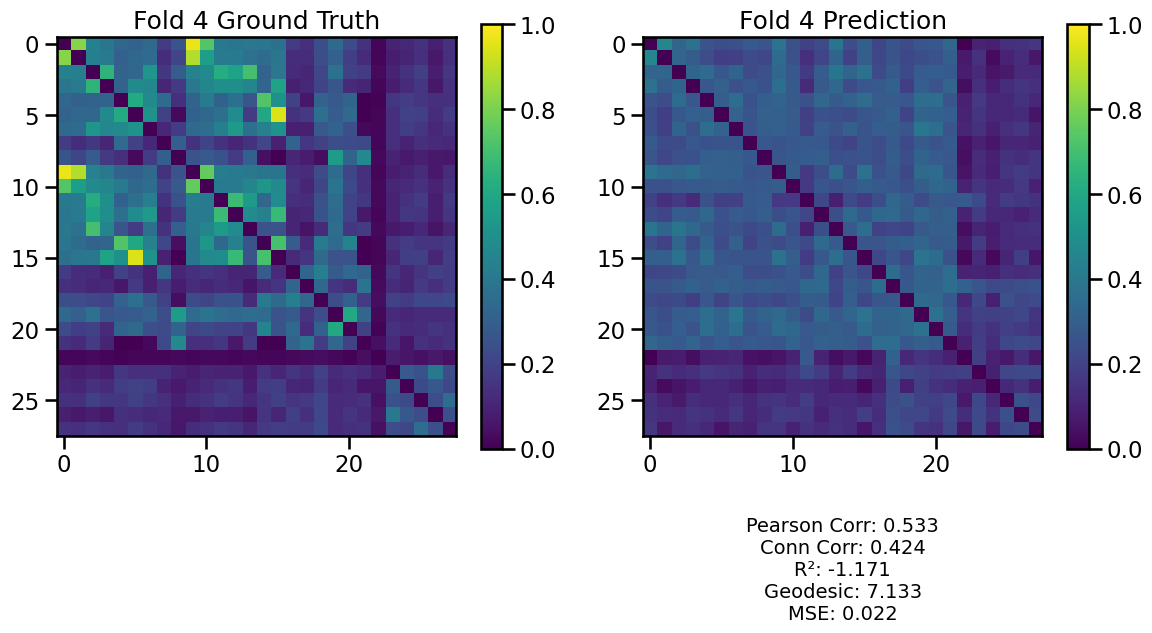

In [22]:
plot.plot_single_model_predictions_with_metrics(transPCAkron_xgb_random_nonshared_sim_results)

In [18]:
transPCAkron_xgb_community_nonshared_sim_results = single_sim_run(cv_type='community',
                                              model_type='xgboost',
                                              feature_type='trans only',
                                              summary_measure='PCA+kron',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False, 
                                              save_sim=False,
                                              search_method='grid'
                                              )

Number of components explaining 95.0% of the variance: 34
Processing fold 0...
Processing fold 1...
Processing fold 2...

 Test fold num: 1
(6320, 1156) (6320,) (1122, 1156) (1122,)
2
3
Processing fold 0...
Processing fold 1...
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total time=  12.0s
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total time=  10.1s

Grid Search CV Results:
Best Parameters:  {'colsample_bytree': 1, 'device': 'cuda', 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 1, 'tree_

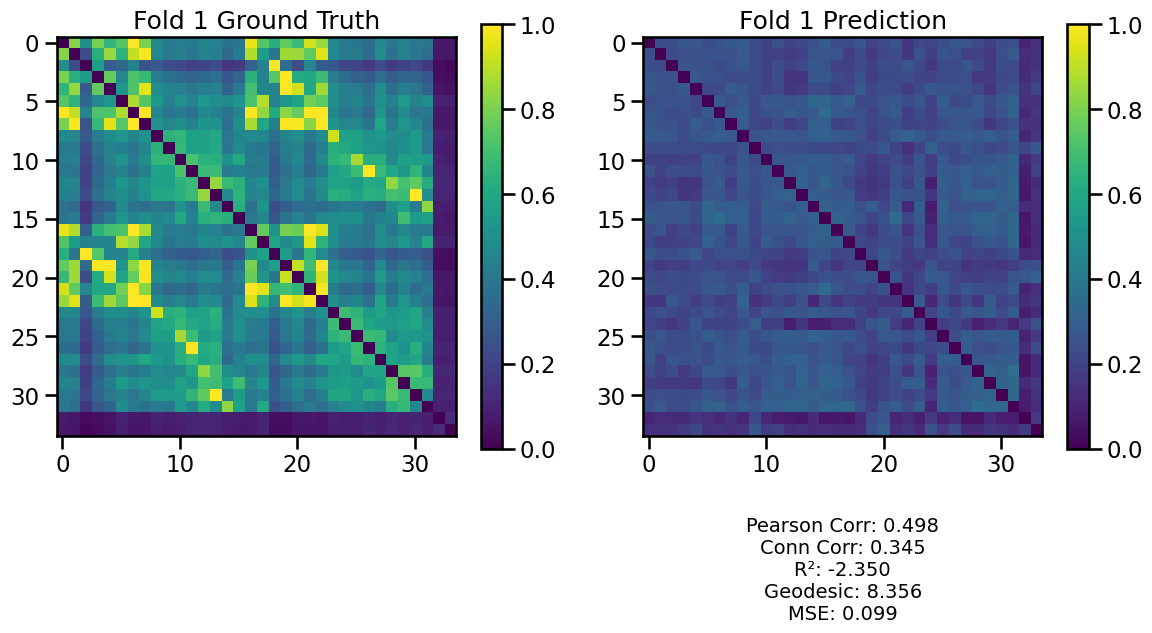

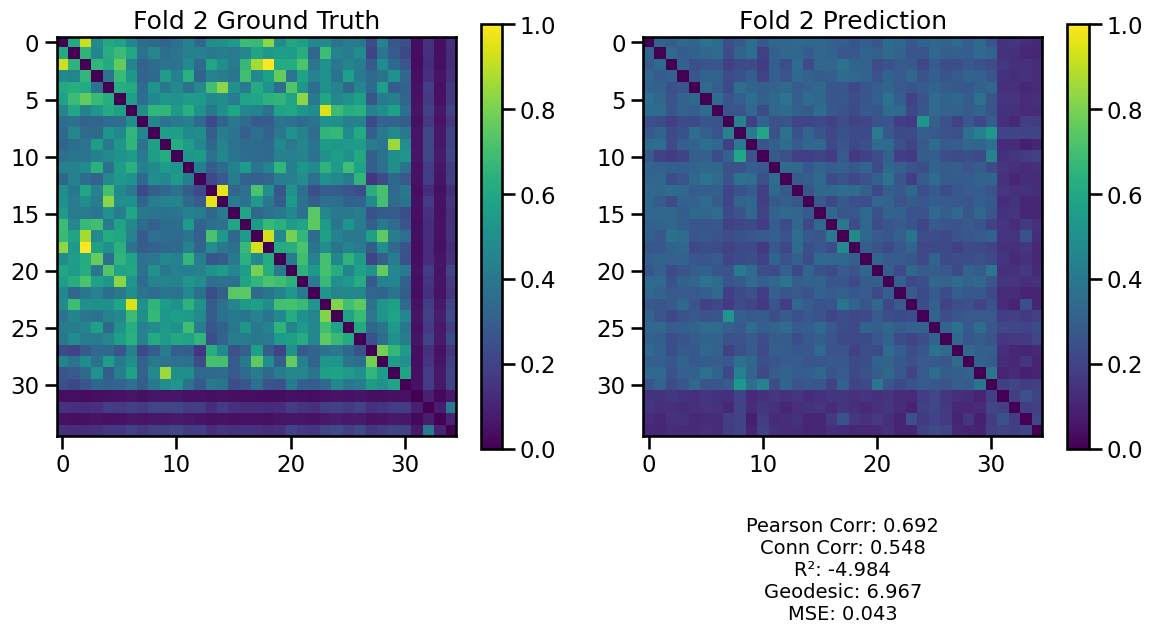

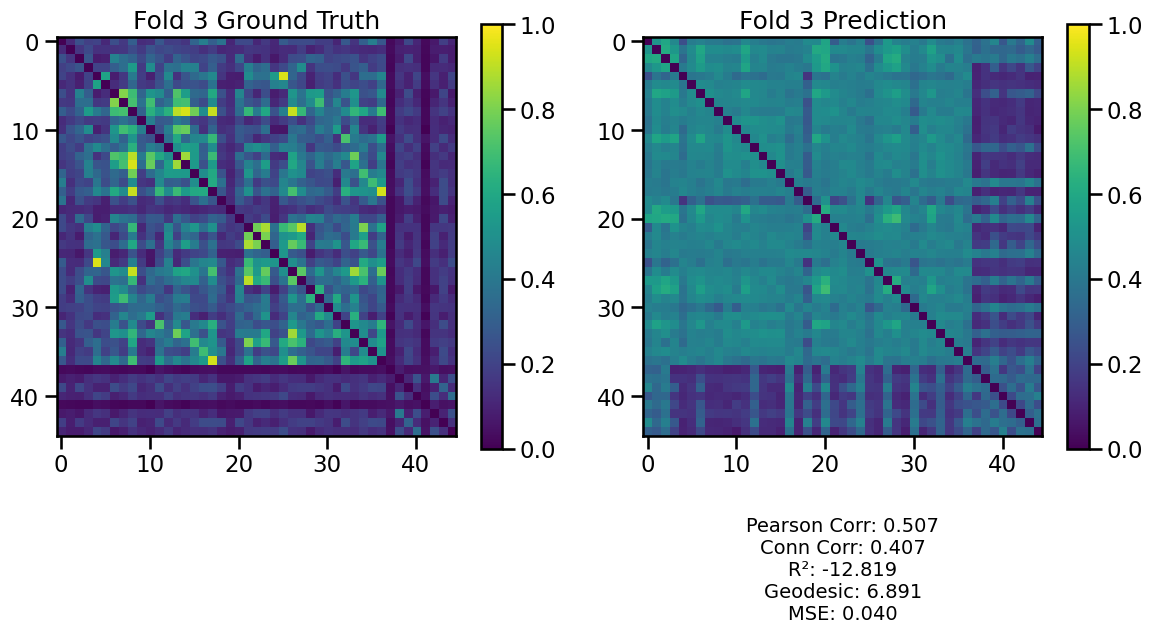

In [19]:
plot.plot_single_model_predictions_with_metrics(transPCAkron_xgb_community_nonshared_sim_results)

### Multi feature experiment run

In [163]:
custom_xgb_random_nonshared_sim_results = single_sim_run(
                                              cv_type='random',
                                              model_type='xgboost',
                                              feature_type=['transcriptomePCA', 'structural'],
                                              summary_measure=None,
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False,
                                              save_sim=False,
                                              search_method='bayes'
                                              )

Number of components explaining 95.0% of the variance: 34
self X shape (114, 148)
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(7140, 296) (7140,) (812, 296) (812,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
model build init 296
ACCELERATING
{'base_estimator': 'GP', 'acq_func': 'PI'}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
y_true shape: (812,)
y_pred shape: (812,)
[CV 1/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=0.378 total time=   1.6s
y_true shape: (756,)
y_pred shape: (756,)
[CV 2/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=0.175 total time=   0.3s
y_true sha

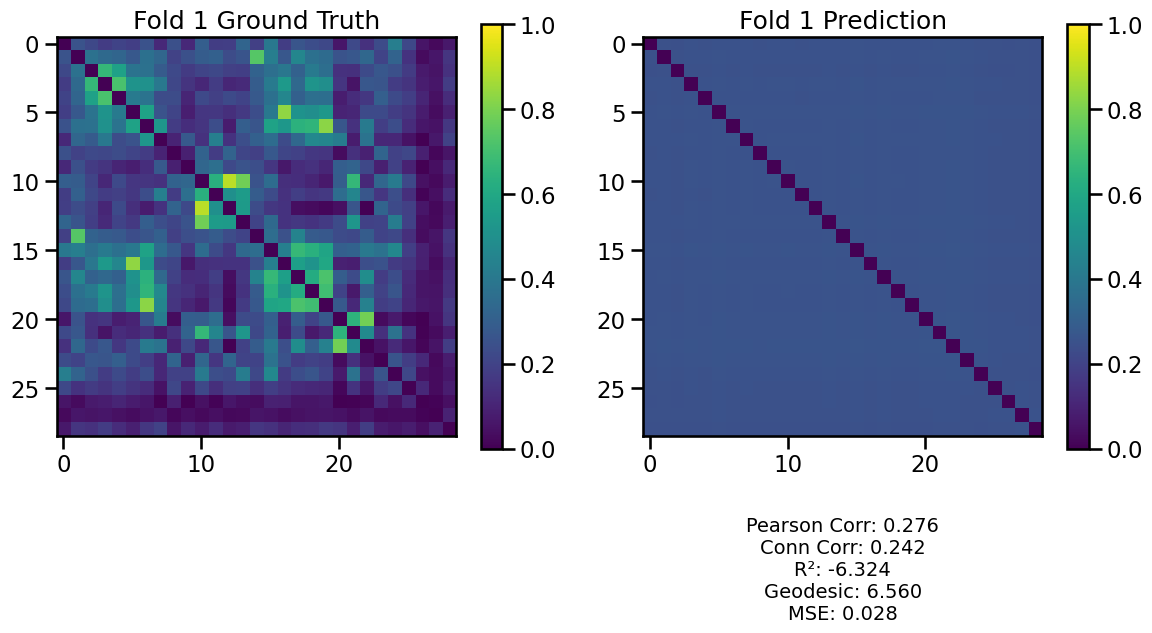

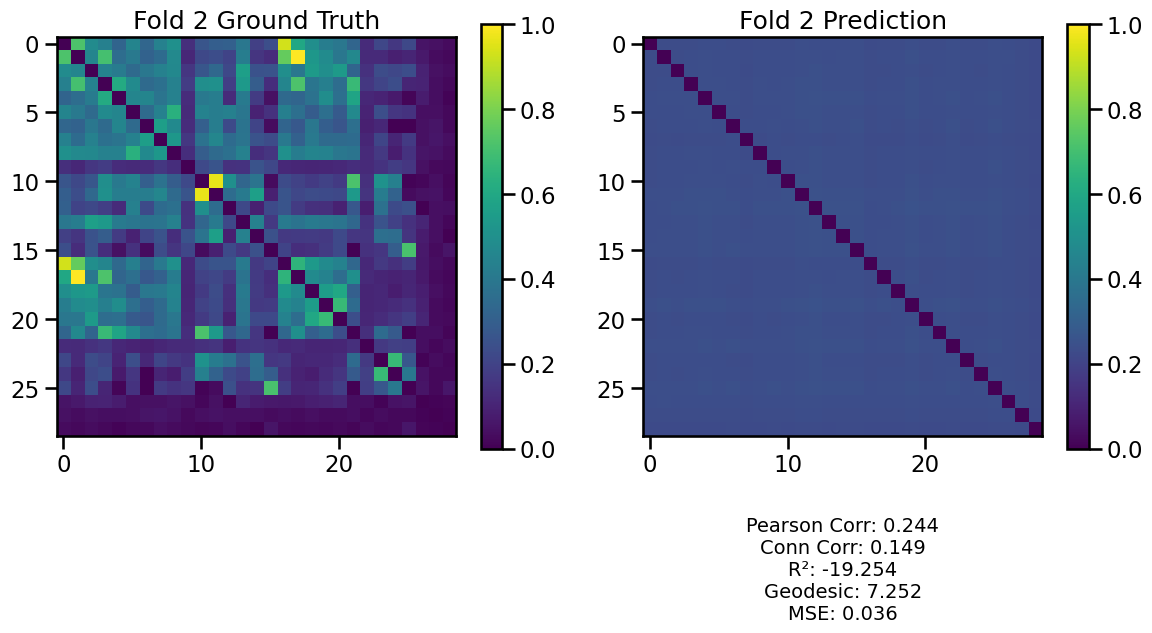

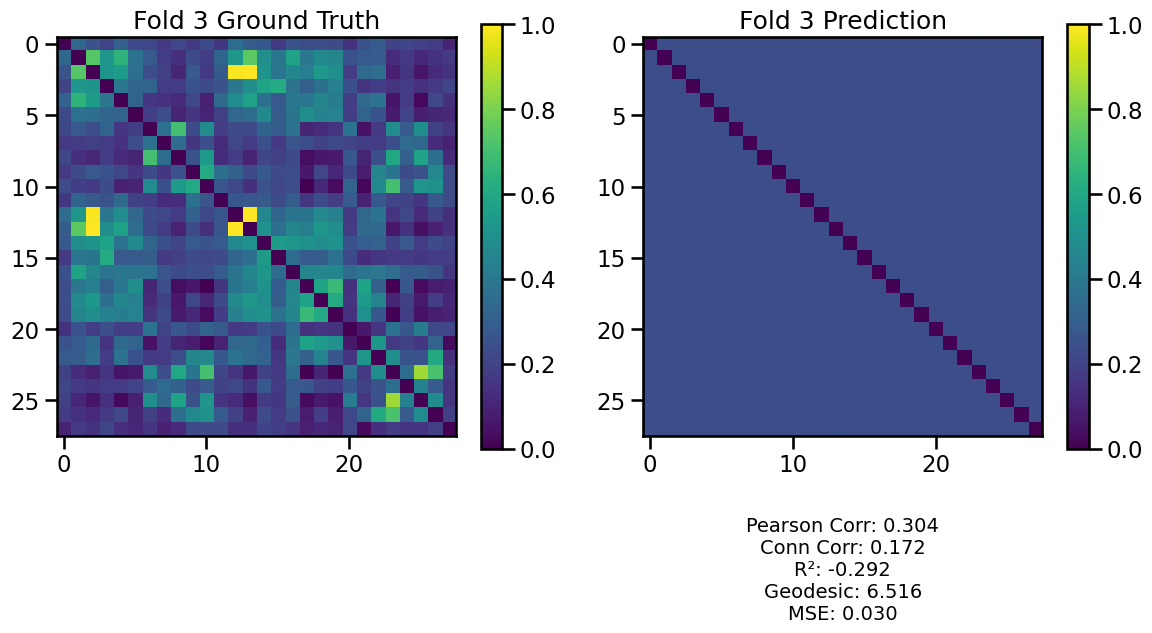

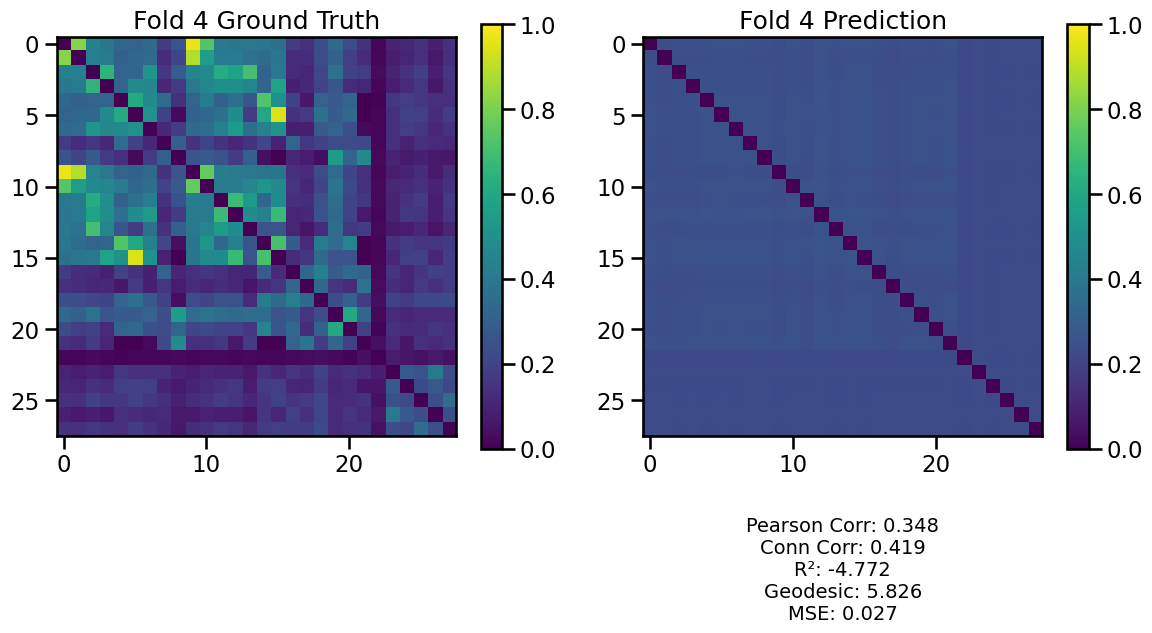

In [16]:
plot.plot_single_model_predictions_with_metrics(custom_xgb_random_nonshared_sim_results)